<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Ames dataset: To ma

---


As a member of a firm based in neighbouring Des Moines that intends to set up in Ames, Iowa, our boss has asked our team to come up with an independent analysis of the market there which can be used to map to our existing assumptions about real estate.
- Location is important 
- Quality of the house
- Possible Question: Are there other features that are important?

As a data analyst within the firm, we have been tasked to explore the dataset that our procurement team got, and report our findings and limitations. 


Data description
http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics 
from sklearn.metrics import r2_score

from sklearn.linear_model import Lasso, LassoCV

In [15]:
df = pd.read_csv('./datasets/train.csv') 

In [16]:
#exploring the data
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [17]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [18]:
df.shape

(2051, 81)

In [19]:
pd.set_option('display.max_rows', 200)

In [20]:
df.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [21]:
#converting the column names to not have spacing
df.columns = df.columns.str.replace(' ','_')

In [22]:
#converting the column names to lowercase 
df.columns = df.columns.str.lower()

In [23]:
#take a look at the new column names
df.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [24]:
#df[df.columns[df.isnull().any()]];df.isnull().any();
#df.isna().any();
#df[df.columns[df.isnull().any()]];

In [25]:
df['age_house'] = df['yr_sold'] - df['year_built']

In [26]:
df['age_house']

0        34
1        13
2        57
3         4
4       110
       ... 
2046      1
2047     69
2048     81
2049     53
2050     11
Name: age_house, Length: 2051, dtype: int64

In [27]:
df['age_house'].describe()
#error with the age_house being -1.

count    2051.000000
mean       36.066797
std        30.211061
min        -1.000000
25%         7.000000
50%        34.000000
75%        54.000000
max       136.000000
Name: age_house, dtype: float64

In [28]:
print(df[df['age_house'] == -1]["yr_sold"])    #year_sold is 2007  
print(df[df['age_house'] == -1]["year_built"]) #year_built is 2008
#remove this particular data as we are unable to infer the year 
df[df['age_house'] == -1]

1885    2007
Name: yr_sold, dtype: int64
1885    2008
Name: year_built, dtype: int64


,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,age_house
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,183850,-1


In [29]:
df = df.loc[df["id"] != 2181]
#check the variable again to make sure
df['age_house'].describe()

count    2050.000000
mean       36.084878
std        30.207330
min         0.000000
25%         7.000000
50%        34.000000
75%        54.000000
max       136.000000
Name: age_house, dtype: float64

<AxesSubplot:xlabel='yr_sold', ylabel='year_built'>

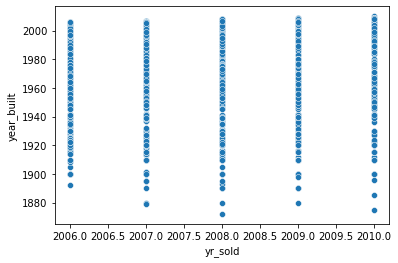

In [30]:
sns.scatterplot(data=df, x= "yr_sold", y="year_built")

In [31]:
df['age_garage'] = df['yr_sold'] - df['garage_yr_blt']

In [32]:
df['age_garage'].describe()
#error with the garage age being -200
df[df['age_garage'] == -200]
#We want to see if there is indeed a garage there for this particular ID
df[df['age_garage'] == -200]["garage_type"]
#they actually do have a garage

1699    Attchd
Name: garage_type, dtype: object

In [33]:
print(df[df['age_garage'] == -200]["yr_sold"])
print(df[df['age_garage'] == -200]["garage_yr_blt"])
#seems to be a typo for 2207 from 2007. The difference in year should then be 0.

1699    2007
Name: yr_sold, dtype: int64
1699    2207.0
Name: garage_yr_blt, dtype: float64


In [34]:
df['age_garage'] = df['age_garage'].replace(-200,1)
df['age_garage'].describe()

count    1936.000000
mean       29.189566
std        24.949411
min         0.000000
25%         6.000000
50%        28.000000
75%        47.000000
max       114.000000
Name: age_garage, dtype: float64

In [35]:
df["recent_remod/add"] = df['yr_sold'] -df["year_remod/add"]

In [36]:
df["recent_remod/add"].describe()

count    2050.000000
mean       23.598049
std        21.018605
min        -1.000000
25%         4.000000
50%        15.000000
75%        43.000000
max        60.000000
Name: recent_remod/add, dtype: float64

In [37]:
df[df['recent_remod/add'] == -1]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,age_house,age_garage,recent_remod/add
1719,1703,528120010,60,RL,134.0,16659,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,6,2007,New,260116,0,0.0,-1


In [38]:
print(df[df['recent_remod/add'] == -1]["yr_sold"])
print(df[df['recent_remod/add'] == -1]["year_remod/add"])
#we will remove this row as we cannot infer any typos or alternative substitutes 
#for the year_remod/add

1719    2007
Name: yr_sold, dtype: int64
1719    2008
Name: year_remod/add, dtype: int64


In [39]:
df = df.loc[df["id"] != 1719]

### Dropping off "year" columns that we have added the age of

we will drop df['year_built'], df['garage_yr_blt'], and ["year_remod/add"]
as it is more meaningful to see the age of these structures, which we have added 

In [40]:
df.drop(columns = ["year_built"], inplace = True )

In [41]:
df.drop(columns = ["garage_yr_blt"], inplace = True )

In [42]:
df.drop(columns = ["year_remod/add"], inplace = True )

### Finding out which columns have null values


In [43]:
df.columns[df.isnull().any()]

Index(['lot_frontage', 'alley', 'mas_vnr_type', 'mas_vnr_area', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'bsmt_full_bath', 'bsmt_half_bath', 'fireplace_qu', 'garage_type',
       'garage_finish', 'garage_cars', 'garage_area', 'garage_qual',
       'garage_cond', 'pool_qc', 'fence', 'misc_feature', 'age_garage'],
      dtype='object')

In [44]:
df.isnull().sum()

id                     0
pid                    0
ms_subclass            0
ms_zoning              0
lot_frontage         330
lot_area               0
street                 0
alley               1909
lot_shape              0
land_contour           0
utilities              0
lot_config             0
land_slope             0
neighborhood           0
condition_1            0
condition_2            0
bldg_type              0
house_style            0
overall_qual           0
overall_cond           0
roof_style             0
roof_matl              0
exterior_1st           0
exterior_2nd           0
mas_vnr_type          22
mas_vnr_area          22
exter_qual             0
exter_cond             0
foundation             0
bsmt_qual             55
bsmt_cond             55
bsmt_exposure         58
bsmtfin_type_1        55
bsmtfin_sf_1           1
bsmtfin_type_2        56
bsmtfin_sf_2           1
bsmt_unf_sf            1
total_bsmt_sf          1
heating                0
heating_qc             0


In [45]:
#placing these new columns into a dataframe for easier viewing
df1 = df[['lot_frontage', 'alley', 'mas_vnr_type', 'mas_vnr_area', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'bsmt_full_bath', 'bsmt_half_bath', 'fireplace_qu', 'garage_type', 'garage_finish', 'garage_cars', 'garage_area',
       'garage_qual', 'garage_cond', 'pool_qc', 'fence', 'misc_feature','age_garage']]

In [46]:
#sum of the number of null values for columns with nulls
df1.isnull().sum()

lot_frontage       330
alley             1909
mas_vnr_type        22
mas_vnr_area        22
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1000
garage_type        113
garage_finish      114
garage_cars          1
garage_area          1
garage_qual        114
garage_cond        114
pool_qc           2040
fence             1649
misc_feature      1985
age_garage         114
dtype: int64

### Cleaning of data: Lot Frontage

In [47]:
df["lot_frontage"].describe()

count    1719.000000
mean       69.037231
std        23.220831
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: lot_frontage, dtype: float64

In [48]:
#it is likely that these lots just simply do not have a connection to the street.
# we can change these to simply 0

df['lot_frontage'] = df['lot_frontage'].fillna(0)

<AxesSubplot:xlabel='lot_frontage', ylabel='saleprice'>

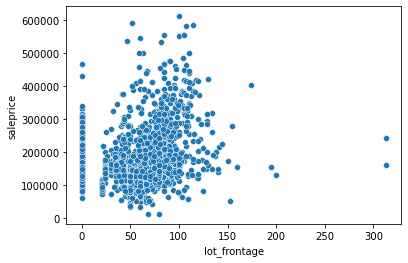

In [49]:
sns.scatterplot(data=df, x = "lot_frontage", y="saleprice")
#the scatterplot seems to have many values that are at 0, which might skew the
#linear regression against sales price
#such a high distribution might be better suited for a binary (w fence or w/o fence)
#we will review again whether to include lot_frontage in our model

### Cleaning of data: Alley

In [50]:
df["alley"].describe()
#NA means no alley access, so we can just change values to "no access"

df["alley"].head()
df['alley'] = df['alley'].fillna("NoAC")

<AxesSubplot:xlabel='alley', ylabel='saleprice'>

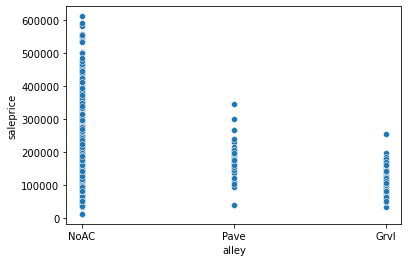

In [51]:
sns.scatterplot(data=df, x = "alley", y="saleprice")
#no particular outliers that we want to remove

### Cleaning of data: Mas Vnr Type

In [52]:
df["mas_vnr_type"].value_counts()

None       1218
BrkFace     630
Stone       166
BrkCmn       13
Name: mas_vnr_type, dtype: int64

In [53]:
df["mas_vnr_type"].value_counts()
#we cannot infer that these null values means "none" as there is explicitly a "none" category
#we will drop the null values as it is a small subset of the total
df = df.dropna(subset=["mas_vnr_type"])
#the null values for mas_vnr_area is now gone as well

<AxesSubplot:xlabel='mas_vnr_type', ylabel='saleprice'>

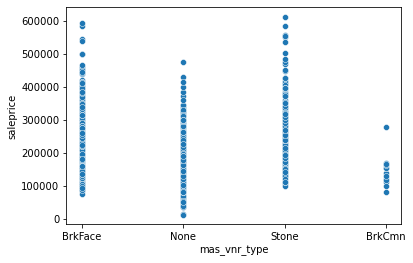

In [54]:
sns.scatterplot(data=df, x = "mas_vnr_type", y="saleprice")

In [55]:
df[df["mas_vnr_type"] == "BrkCmn"]["saleprice"]
#there seems to be a high value for one of the BrkCmn prices. We will leave it for now as it does
#as we do not want to make generalisations of BrkCmn's characteristics for now

471     277000
528     139000
557     109900
580      82500
716     153000
840     120000
1144    169000
1224    154204
1362    163000
1457     98600
1589    118500
1695    129000
1768    165000
Name: saleprice, dtype: int64

### Cleaning of data: Basement

In [56]:
df["bsmt_qual"].describe()
#we found out that NA values might simply mean that there is no basement,
#and not that there is missing data
#this would have ramifications for bsmt_cond, bsmt_exposure
#and possibly bmstfin_type_1 and bsmtfin_type_2
#we can do an EDA into these few data types, and possibly assume that those
#that have NA in commons rows means that there is simply no basement

count     1972
unique       5
top         TA
freq       886
Name: bsmt_qual, dtype: object

In [57]:
df_bsmt_explr= df[["id","bsmt_qual", "bsmt_cond", "bsmt_exposure","bsmtfin_type_1","bsmtfin_sf_1", "bsmtfin_type_2","bsmtfin_sf_2","bsmt_unf_sf","total_bsmt_sf","bsmt_full_bath","bsmt_half_bath"]]

In [58]:
df_bsmt_explr[df_bsmt_explr["bsmt_exposure"].isnull()]
#the NaN values for bsmt_sf_1 and bsmt_sf_2, bsmtfin_unf_sf and total_bsmt_sf and correspond to NaN values within quality.
# when swopping in these values, we will swop these out as well.
# we will first drop the rolls that are in "bsmt exposure" 
# that do not have commonalities with the rest, as bsmt_exposure has 58 null values while the rest
# have only 55

,id,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
12,807,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
93,811,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
114,781,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
146,888,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
183,1554,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
240,2740,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
249,2242,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
256,2745,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
390,84,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
437,1501,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [59]:
#we located the 3, which have "id" of 1797, 67 and 2780
#these have an unfinished bsmt, which might suggest why they did not indicate
#the Bsmt exposure levels yet
#we will remove them as there are no suitable categories for bsmt_exposure.
df = df.loc[df["id"] != 1797]
df = df.loc[df["id"] != 67]
df = df.loc[df["id"] != 2780]

In [60]:
#checking the basement-columns
df_bsmt_explr= df[["id","bsmt_qual", "bsmt_cond", "bsmt_exposure","bsmtfin_type_1","bsmtfin_sf_1", "bsmtfin_type_2","bsmtfin_sf_2","bsmt_unf_sf","total_bsmt_sf"]]

In [61]:
df_bsmt_explr[df_bsmt_explr["bsmtfin_type_2"].isnull()]

,id,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf
12,807,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
93,811,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
114,781,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
146,888,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
183,1554,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
240,2740,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
249,2242,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
256,2745,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
390,84,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
437,1501,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0


In [62]:
#removing id 445 as there is no indication for basement type 2
df = df.loc[df["id"] != 445]

##### We will now fill the rest with NB (No basement) as indicated in the data description

In [63]:
df['bsmt_qual'] = df['bsmt_qual'].fillna("NB")
df['bsmt_cond'] = df['bsmt_cond'].fillna("NB")
df['bsmt_exposure'] = df['bsmt_exposure'].fillna("NB")
df['bsmtfin_type_1'] = df['bsmtfin_type_1'].fillna("NB")
df['bsmtfin_type_2'] = df['bsmtfin_type_2'].fillna("NB")
df['bsmt_full_bath'] = df['bsmt_full_bath'].fillna("0.0") #0 indicates there is no such bath
df['bsmt_half_bath'] = df['bsmt_half_bath'].fillna("0.0") #0 indicates there is no such half-bath

In [64]:
#Will not be filled, drop the row, as it has NA for all the BSMT values, and is not useful
#this corresponds to the bsmtfin_sf_2 row and bsmt_unf_sf row and total_bsmt row that needs to be 
#removed
df = df.dropna(subset=["bsmtfin_sf_1"])

<AxesSubplot:xlabel='bsmt_qual', ylabel='saleprice'>

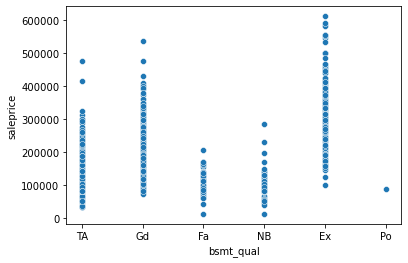

In [65]:
sns.scatterplot(data=df, x = "bsmt_qual", y="saleprice")


<AxesSubplot:xlabel='bsmt_cond', ylabel='saleprice'>

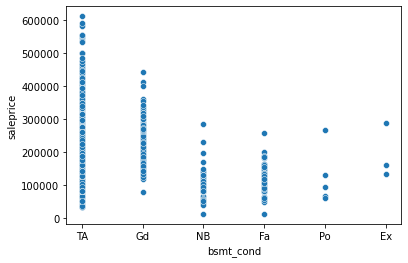

In [66]:
sns.scatterplot(data=df, x = "bsmt_cond", y="saleprice")


<AxesSubplot:xlabel='bsmt_exposure', ylabel='saleprice'>

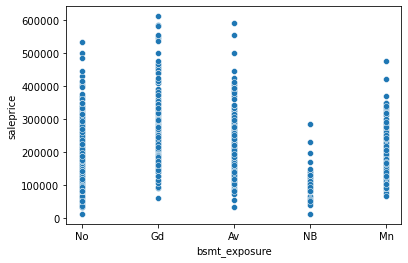

In [67]:
sns.scatterplot(data=df, x = "bsmt_exposure", y="saleprice")


<AxesSubplot:xlabel='bsmtfin_type_1', ylabel='saleprice'>

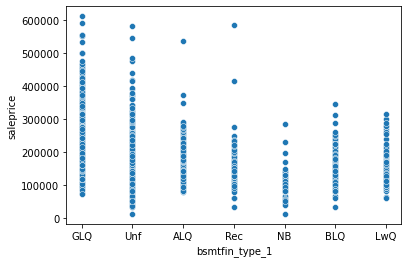

In [68]:
sns.scatterplot(data=df, x = "bsmtfin_type_1", y="saleprice")

<AxesSubplot:xlabel='bsmtfin_type_2', ylabel='saleprice'>

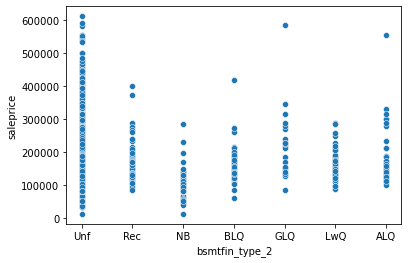

In [69]:
sns.scatterplot(data=df, x = "bsmtfin_type_2", y="saleprice")

In [70]:
df['bsmt_full_bath'].value_counts()

0.0    1185
1.0     811
2.0      23
3.0       2
0.0       1
Name: bsmt_full_bath, dtype: int64

<AxesSubplot:xlabel='bsmt_full_bath', ylabel='saleprice'>

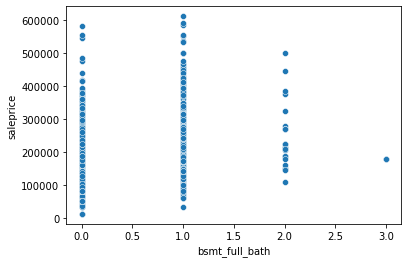

In [71]:
sns.scatterplot(data=df, x = "bsmt_full_bath", y="saleprice")

In [72]:
df['bsmt_half_bath'].value_counts()

0.0    1896
1.0     121
2.0       4
0.0       1
Name: bsmt_half_bath, dtype: int64

<AxesSubplot:xlabel='bsmt_half_bath', ylabel='saleprice'>

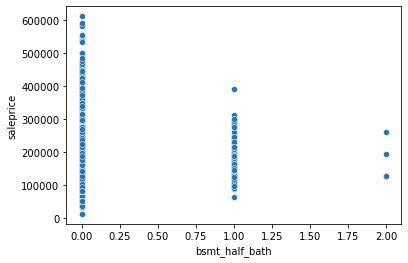

In [73]:
sns.scatterplot(data=df, x = "bsmt_half_bath", y="saleprice")

### Cleaning of data: Fireplaces

In [74]:
df['fireplaces'].value_counts()
#this matches the fireplace quality value of NA, therefore we can see the missing values of fireplace quality simply means there is no fireplace

0    990
1    882
2    143
3      6
4      1
Name: fireplaces, dtype: int64

In [75]:
df['fireplace_qu'].value_counts

<bound method IndexOpsMixin.value_counts of 0       NaN
1        TA
2       NaN
3       NaN
4       NaN
       ... 
2046     Gd
2047    NaN
2048     TA
2049     Gd
2050     TA
Name: fireplace_qu, Length: 2022, dtype: object>

In [76]:
df['fireplace_qu'] = df['fireplace_qu'].fillna("None")

### Cleaning of data: Garage

In [77]:
#garage_type na values simply means that there is no garage
#we havet to find the additional NA values for garage_yr_blt and garage_finish 
#that does not 

In [78]:
garage = df[["id","garage_type", "age_garage", "garage_finish","garage_cars","garage_area", "garage_qual", "garage_cond"]]

In [79]:
garage[garage["age_garage"].isnull()];
#garage_type has 112 values that are null, which likely means that these houses 
#do not have garages rather than there being no values
# these are the common rows with the others that are also garage-related columns
#for these values, we intend to remove them, but we have to check whether they are
# common with garage-type

#for garage_cars and garage_area, we can see that these share a common row 
#with NA values for garage_type

#id = 2237 is the one that is outlying, and we have to remove this row

In [80]:
df = df.loc[df["id"] != 2237]
#this removed the row for garage_cars and garage_area

In [81]:
df.isnull().sum()

id                     0
pid                    0
ms_subclass            0
ms_zoning              0
lot_frontage           0
lot_area               0
street                 0
alley                  0
lot_shape              0
land_contour           0
utilities              0
lot_config             0
land_slope             0
neighborhood           0
condition_1            0
condition_2            0
bldg_type              0
house_style            0
overall_qual           0
overall_cond           0
roof_style             0
roof_matl              0
exterior_1st           0
exterior_2nd           0
mas_vnr_type           0
mas_vnr_area           0
exter_qual             0
exter_cond             0
foundation             0
bsmt_qual              0
bsmt_cond              0
bsmt_exposure          0
bsmtfin_type_1         0
bsmtfin_sf_1           0
bsmtfin_type_2         0
bsmtfin_sf_2           0
bsmt_unf_sf            0
total_bsmt_sf          0
heating                0
heating_qc             0


In [82]:
df['garage_type'] = df['garage_type'].fillna("NoGa")

In [83]:
df['garage_finish'] = df['garage_finish'].fillna("NoGa")

In [84]:
df['garage_qual'] = df['garage_qual'].fillna("NoGa")

In [85]:
df['garage_cond'] = df['garage_cond'].fillna("NoGa")

In [86]:
#df['age_garage'] = df['age_garage'].fillna("NoGa") <-we cannot do this because
#the variable is continuous and we would not be able to account for 
#these counts

In [87]:
df["age_diff"] = df["age_house"] - df["age_garage"]

In [88]:
df["age_diff"].describe()

count    1909.000000
mean        5.255107
std        16.049660
min       -15.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       123.000000
Name: age_diff, dtype: float64

In [89]:
#we have decided to remove this column because we cannot sufficiently 
#extrapolate the values of the missing values based on the next
#nearest parameter

#we also do not want to drop these rows, as 112 rows is quite significant
#and could affect our other values

In [90]:
df.drop(columns= "age_garage", inplace= True)

In [91]:
df.drop(columns= "age_diff", inplace= True)

In [92]:
df.isnull().sum()

id                     0
pid                    0
ms_subclass            0
ms_zoning              0
lot_frontage           0
lot_area               0
street                 0
alley                  0
lot_shape              0
land_contour           0
utilities              0
lot_config             0
land_slope             0
neighborhood           0
condition_1            0
condition_2            0
bldg_type              0
house_style            0
overall_qual           0
overall_cond           0
roof_style             0
roof_matl              0
exterior_1st           0
exterior_2nd           0
mas_vnr_type           0
mas_vnr_area           0
exter_qual             0
exter_cond             0
foundation             0
bsmt_qual              0
bsmt_cond              0
bsmt_exposure          0
bsmtfin_type_1         0
bsmtfin_sf_1           0
bsmtfin_type_2         0
bsmtfin_sf_2           0
bsmt_unf_sf            0
total_bsmt_sf          0
heating                0
heating_qc             0


## Pool Quality

In [93]:
#poolQC means that there is likely no pool, not that there is no data collected

In [94]:
df['pool_qc'] = df['pool_qc'].fillna("NoPo")

In [95]:
df.isnull().sum()

id                     0
pid                    0
ms_subclass            0
ms_zoning              0
lot_frontage           0
lot_area               0
street                 0
alley                  0
lot_shape              0
land_contour           0
utilities              0
lot_config             0
land_slope             0
neighborhood           0
condition_1            0
condition_2            0
bldg_type              0
house_style            0
overall_qual           0
overall_cond           0
roof_style             0
roof_matl              0
exterior_1st           0
exterior_2nd           0
mas_vnr_type           0
mas_vnr_area           0
exter_qual             0
exter_cond             0
foundation             0
bsmt_qual              0
bsmt_cond              0
bsmt_exposure          0
bsmtfin_type_1         0
bsmtfin_sf_1           0
bsmtfin_type_2         0
bsmtfin_sf_2           0
bsmt_unf_sf            0
total_bsmt_sf          0
heating                0
heating_qc             0


In [96]:
df['pool_qc'].value_counts()

NoPo    2012
Gd         4
Fa         2
TA         2
Ex         1
Name: pool_qc, dtype: int64

In [97]:
#fence for NA means that there is no fence, which is more likely than there 
#being no value collected 

In [98]:
df['fence'] = df['fence'].fillna("NoFe")

In [99]:
#MISC for NA means that there is no misc features, which just means that we want

In [100]:
df['misc_feature'] = df['misc_feature'].fillna("NoFt")

In [101]:
df.corr().columns

Index(['id', 'pid', 'ms_subclass', 'lot_frontage', 'lot_area', 'overall_qual',
       'overall_cond', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf',
       'low_qual_fin_sf', 'gr_liv_area', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces',
       'garage_cars', 'garage_area', 'wood_deck_sf', 'open_porch_sf',
       'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'misc_val',
       'mo_sold', 'yr_sold', 'saleprice', 'age_house', 'recent_remod/add'],
      dtype='object')

## Feature Selection and Further EDA

We want to find the variables that are highly correlated with our sales price.

For the numerical data, we see if there is a high corr (>0.4 or <-0.4) to see which are those that we want to include.

For the categorical variables we will use pair plots to see if there are any visible correlations (or lack of).
Data that have very high counts in only one category might be dropped entirely, or a few of the low value count categories
being merged.


In [102]:
df.corr()["saleprice"].sort_values(ascending=False)

saleprice           1.000000
overall_qual        0.800718
gr_liv_area         0.707159
garage_area         0.650068
garage_cars         0.646957
total_bsmt_sf       0.643262
1st_flr_sf          0.636332
full_bath           0.539232
mas_vnr_area        0.516955
totrms_abvgrd       0.509614
fireplaces          0.472419
bsmtfin_sf_1        0.430006
open_porch_sf       0.331283
wood_deck_sf        0.329713
lot_area            0.298608
half_bath           0.280414
2nd_flr_sf          0.251278
bsmt_unf_sf         0.188752
lot_frontage        0.180196
bedroom_abvgr       0.140195
screen_porch        0.138037
3ssn_porch          0.049944
mo_sold             0.025703
pool_area           0.023797
bsmtfin_sf_2        0.017764
misc_val           -0.009608
yr_sold            -0.011662
low_qual_fin_sf    -0.041083
id                 -0.054207
ms_subclass        -0.085452
overall_cond       -0.092714
kitchen_abvgr      -0.126112
enclosed_porch     -0.137827
pid                -0.251008
recent_remod/a

In [103]:
#columns that have more than 0.4 or greater than -0.4 correlation with saleprice
df_num = df[['overall_qual', 'age_house', 'mas_vnr_area', 'bsmtfin_sf_1', 'total_bsmt_sf', '1st_flr_sf', 'gr_liv_area', 'full_bath', 'totrms_abvgrd', 'fireplaces', 'garage_cars', 'garage_area', 'recent_remod/add']]


### Numerical Variables and further EDA

<AxesSubplot:xlabel='overall_qual', ylabel='saleprice'>

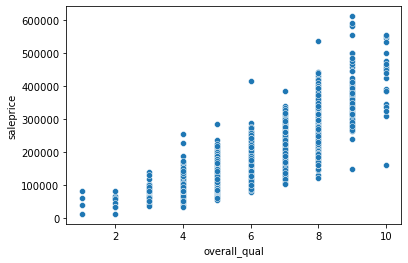

In [104]:
sns.scatterplot(data=df, x = "overall_qual", y="saleprice")


<AxesSubplot:xlabel='age_house', ylabel='saleprice'>

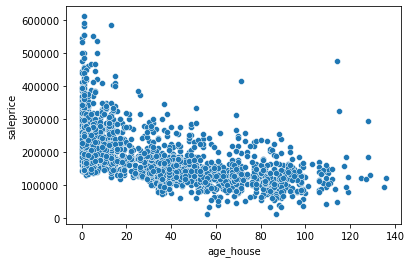

In [105]:
sns.scatterplot(data=df, x = "age_house", y="saleprice")


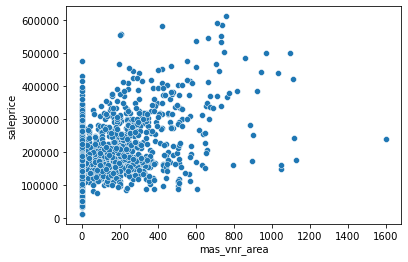

In [106]:
sns.scatterplot(data=df, x = "mas_vnr_area", y="saleprice")
#we will have to take note that the mas_vnr_area of 0 might skew the LR results, and remove it to get a better LR fit 
df["mas_vnr_area"].describe()
df[df["mas_vnr_area"] == 1600]
df = df.loc[df["id"] != 1850]

<AxesSubplot:xlabel='mas_vnr_area', ylabel='saleprice'>

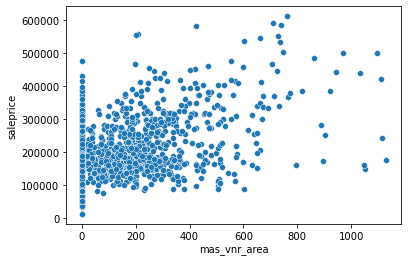

In [107]:
sns.scatterplot(data=df, x = "mas_vnr_area", y="saleprice")

<AxesSubplot:xlabel='bsmtfin_sf_1', ylabel='saleprice'>

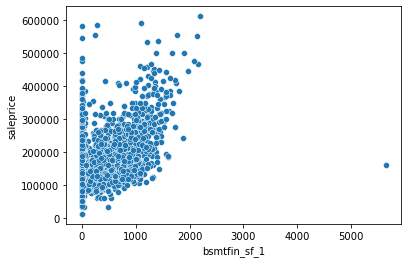

In [108]:
sns.scatterplot(data=df, x = "bsmtfin_sf_1", y="saleprice")
#there is one bsmtfin_sf_1 that seems to be outlier, we will remove it 


<AxesSubplot:xlabel='bsmtfin_sf_1', ylabel='saleprice'>

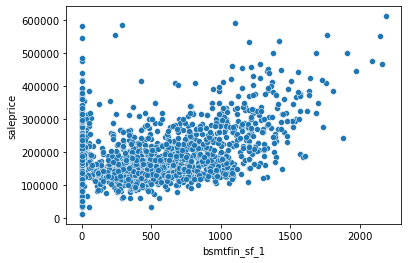

In [109]:
df["bsmtfin_sf_1"].describe()
df[df["bsmtfin_sf_1"] == 5644]
df = df.loc[df["id"] != 1499]
sns.scatterplot(data=df, x = "bsmtfin_sf_1", y="saleprice") #to check

<AxesSubplot:xlabel='total_bsmt_sf', ylabel='saleprice'>

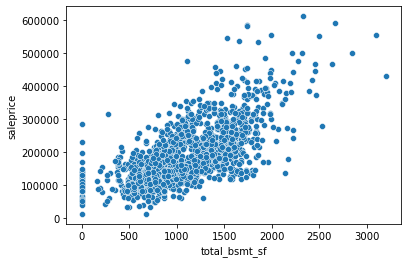

In [132]:
sns.scatterplot(data=df, x = "total_bsmt_sf", y="saleprice")


<AxesSubplot:xlabel='1st_flr_sf', ylabel='saleprice'>

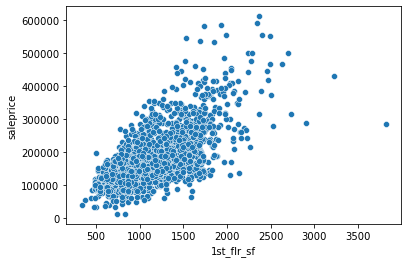

In [133]:
sns.scatterplot(data=df, x = "1st_flr_sf", y="saleprice")
#there is one 1st floor sf that seems to be outlier, we will remove it 

<AxesSubplot:xlabel='1st_flr_sf', ylabel='saleprice'>

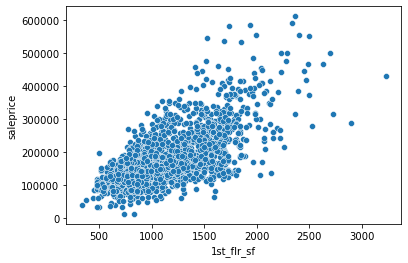

In [134]:
df["1st_flr_sf"].describe()
df[df["1st_flr_sf"] == 3820]
df = df.loc[df["id"] != 1498]
sns.scatterplot(data=df, x = "1st_flr_sf", y="saleprice")

<AxesSubplot:xlabel='gr_liv_area', ylabel='saleprice'>

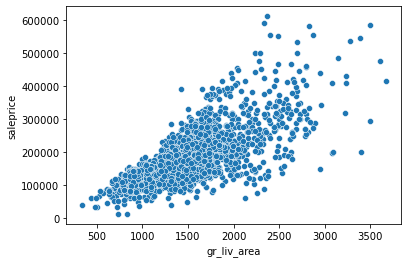

In [135]:
sns.scatterplot(data=df, x = "gr_liv_area", y="saleprice")


<AxesSubplot:xlabel='full_bath', ylabel='saleprice'>

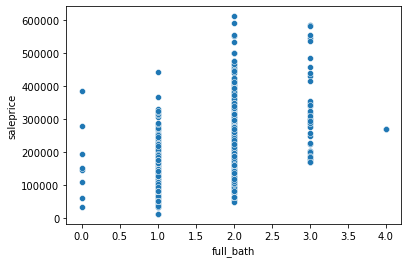

In [136]:
sns.scatterplot(data=df, x = "full_bath", y="saleprice")


<AxesSubplot:xlabel='totrms_abvgrd', ylabel='saleprice'>

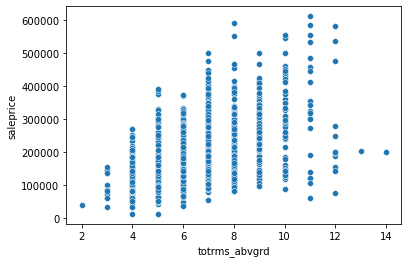

In [137]:
sns.scatterplot(data=df, x = "totrms_abvgrd", y="saleprice")

<AxesSubplot:xlabel='fireplaces', ylabel='saleprice'>

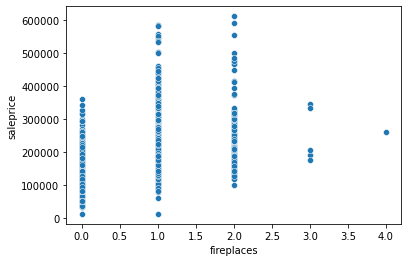

In [138]:
sns.scatterplot(data=df, x = "fireplaces", y="saleprice")

<AxesSubplot:xlabel='garage_cars', ylabel='saleprice'>

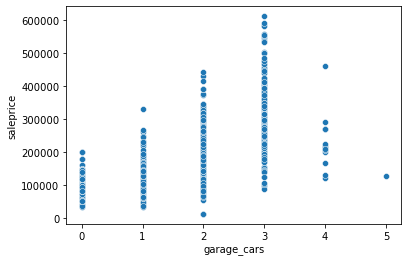

In [139]:
sns.scatterplot(data=df, x = "garage_cars", y="saleprice")

<AxesSubplot:xlabel='garage_area', ylabel='saleprice'>

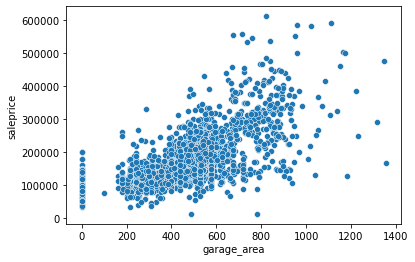

In [140]:
sns.scatterplot(data=df, x = "garage_area", y="saleprice")

<AxesSubplot:xlabel='recent_remod/add', ylabel='saleprice'>

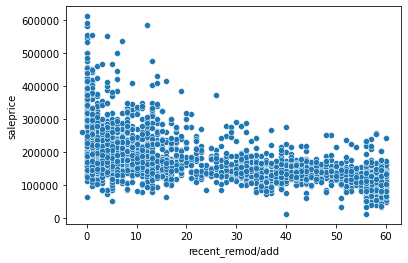

In [141]:
sns.scatterplot(data=df, x = "recent_remod/add", y="saleprice")

Variables that did not have any variables removed seems to have no obvious outliers 

### Categorical variables and further EDA

- Note that for these variables, there are some ordinal ones that actually make more sense to have a value scale (e.g. Excellent, Above Average, Average, Poor, and Very Poor should have values from 5 to 1). We will make these changes.

In [142]:
#identifying that categorical variables for further EDA
df_cat= df.drop(columns = ['id', 'pid', 'ms_subclass', 'lot_frontage', 'lot_area', 'overall_qual',
       'overall_cond', 'age_house', 'mas_vnr_area',
       'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_cars', 'garage_area', 'wood_deck_sf',
       'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'pool_area', 'misc_val', 'mo_sold', 'yr_sold', 'recent_remod/add'])

In [143]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2021 entries, 0 to 2050
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   overall_qual      2021 non-null   int64  
 1   age_house         2021 non-null   int64  
 2   mas_vnr_area      2021 non-null   float64
 3   bsmtfin_sf_1      2021 non-null   float64
 4   total_bsmt_sf     2021 non-null   float64
 5   1st_flr_sf        2021 non-null   int64  
 6   gr_liv_area       2021 non-null   int64  
 7   full_bath         2021 non-null   int64  
 8   totrms_abvgrd     2021 non-null   int64  
 9   fireplaces        2021 non-null   int64  
 10  garage_cars       2021 non-null   float64
 11  garage_area       2021 non-null   float64
 12  recent_remod/add  2021 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 221.0 KB


In [144]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 0 to 2050
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ms_zoning       2018 non-null   object
 1   street          2018 non-null   object
 2   alley           2018 non-null   object
 3   lot_shape       2018 non-null   object
 4   land_contour    2018 non-null   object
 5   utilities       2018 non-null   object
 6   lot_config      2018 non-null   object
 7   land_slope      2018 non-null   object
 8   neighborhood    2018 non-null   object
 9   condition_1     2018 non-null   object
 10  condition_2     2018 non-null   object
 11  bldg_type       2018 non-null   object
 12  house_style     2018 non-null   object
 13  roof_style      2018 non-null   object
 14  roof_matl       2018 non-null   object
 15  exterior_1st    2018 non-null   object
 16  exterior_2nd    2018 non-null   object
 17  mas_vnr_type    2018 non-null   object
 18  exter_qu

### Plots #1

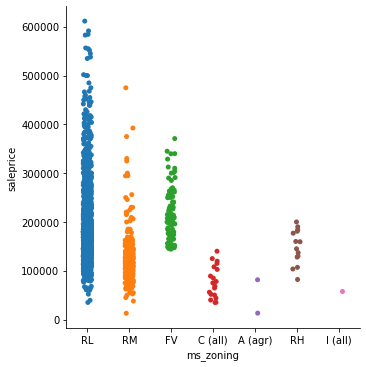

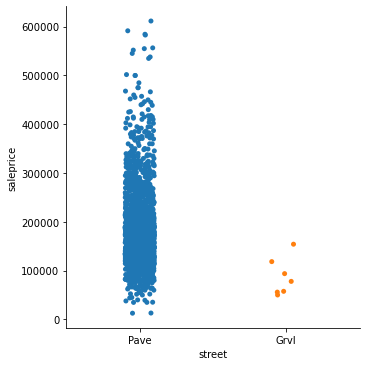

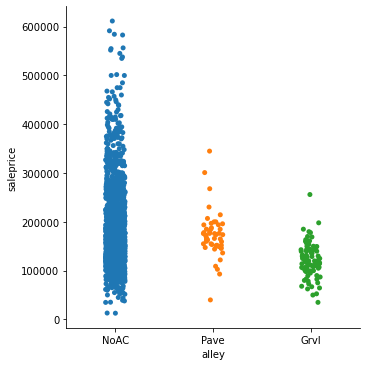

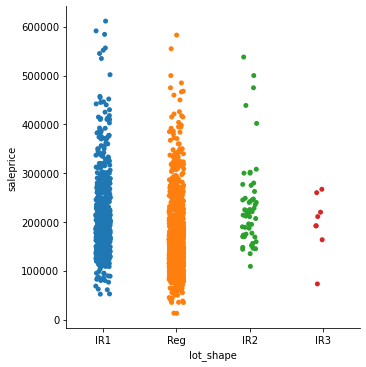

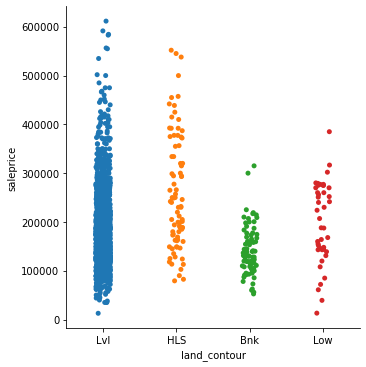

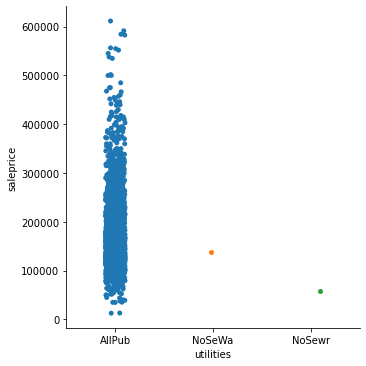

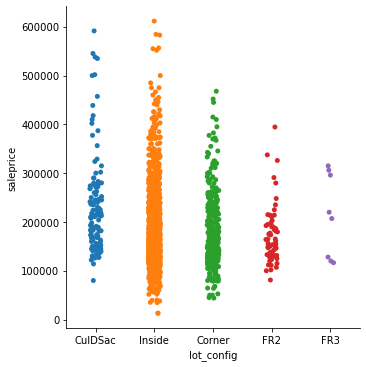

In [145]:
sns.catplot(x="ms_zoning", y="saleprice", data = df_cat)
sns.catplot(x="street", y="saleprice", data = df_cat)
sns.catplot(x="alley", y="saleprice", data = df_cat)
sns.catplot(x="lot_shape", y="saleprice", data = df_cat)
sns.catplot(x="land_contour", y="saleprice", data = df_cat)
sns.catplot(x="utilities", y="saleprice", data = df_cat)
sns.catplot(x="lot_config", y="saleprice", data = df_cat)
#4 categories chosen
#ms_zoning, alley, lot_shape and land_contour all seems to have an effect

#street also seems to have too few values in the Grvl category
#utilities has few in certain categories to make meaningful comparisons, 
# and we removed it
#lot_config does not seem to have significant impacts as well 

In [146]:
df["street"].value_counts(normalize = True)

Pave    0.996531
Grvl    0.003469
Name: street, dtype: float64

In [147]:
df.drop(columns = ["street"], inplace = True )
df.drop(columns = ["utilities"], inplace = True )
df.drop(columns = ["lot_config"], inplace = True )

We are converting the ordinal $lot shape$ category to values that make sense

In [148]:
df['lot_shape'] = df['lot_shape'].replace(['Reg'],4)
df['lot_shape'] = df['lot_shape'].replace(['IR1'],3)
df['lot_shape'] = df['lot_shape'].replace(['IR2'],2)
df['lot_shape'] = df['lot_shape'].replace(['IR3'],1)
df['lot_shape'].value_counts()

4    1281
3     675
2      54
1       8
Name: lot_shape, dtype: int64

### Plots #2

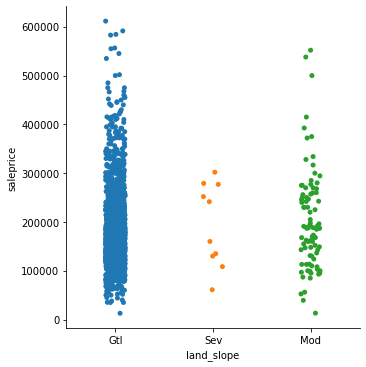

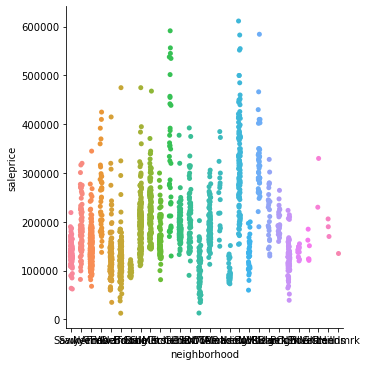

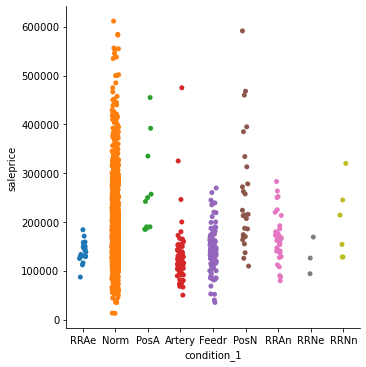

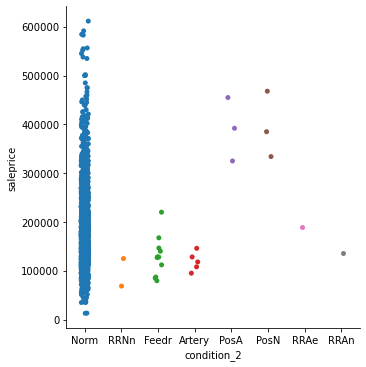

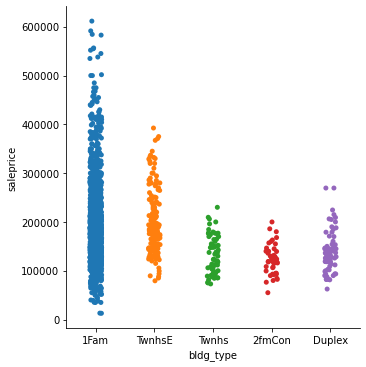

In [149]:
sns.catplot(x="land_slope", y="saleprice", data = df_cat)
sns.catplot(x="neighborhood", y="saleprice", data = df_cat)
sns.catplot(x="condition_1", y="saleprice", data = df_cat)
sns.catplot(x="condition_2", y="saleprice", data = df_cat)
sns.catplot(x="bldg_type", y="saleprice", data = df_cat)


#5 kept
#we are keeping all the categories, even though condition_2 seems
#to have sparse data, we still want to keep it as a way to check with 
#conditon_1's impact

We are converting the $ordinal$ $land slope$ to values that make sense

In [150]:
df['land_slope'].value_counts()
#we will be assigning gentle slope of the property to be 1, and 3 to be the sev, which means severe
#sloping

Gtl    1920
Mod      88
Sev      10
Name: land_slope, dtype: int64

In [151]:
df['land_slope'] = df['land_slope'].replace(['Gtl'],1)
df['land_slope'] = df['land_slope'].replace(['Mod'],2)
df['land_slope'] = df['land_slope'].replace(['Sev'],3)
df['land_slope'].value_counts()

1    1920
2      88
3      10
Name: land_slope, dtype: int64

### Plots #3

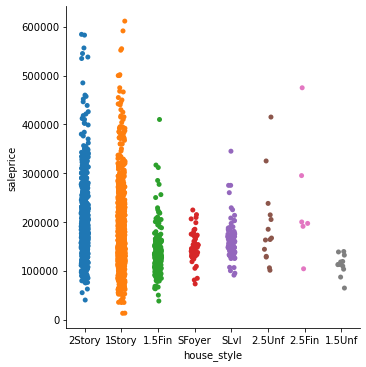

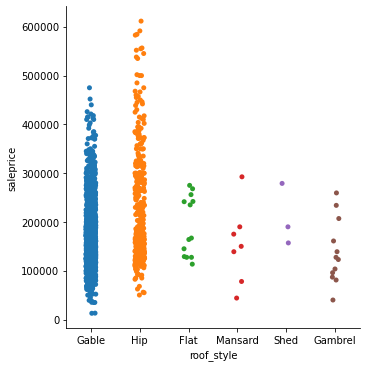

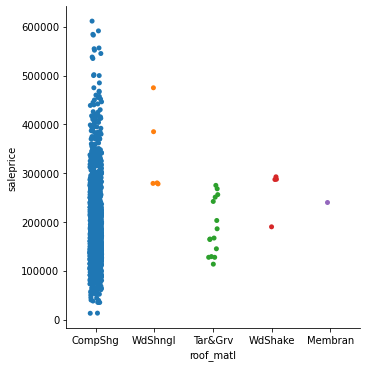

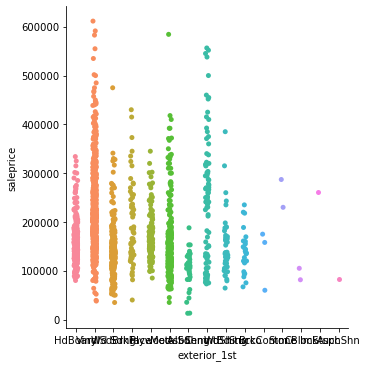

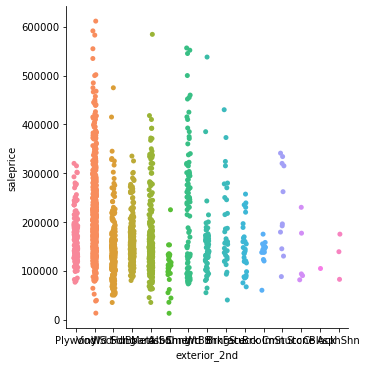

In [152]:
sns.catplot(x="house_style", y="saleprice", data = df_cat)
sns.catplot(x="roof_style", y="saleprice", data = df_cat)
sns.catplot(x="roof_matl", y="saleprice", data = df_cat)
sns.catplot(x="exterior_1st", y="saleprice", data = df_cat)
sns.catplot(x="exterior_2nd", y="saleprice", data = df_cat)
#4 kept
#we are keeping all variables except roof_matl, which has sparse data in some sets
#we will combine the values of Flat, Mansard, Shed and Gambrel to Others for 
#roof_style as they seem to have very few values



In [153]:
df.drop(columns = ["roof_matl"], inplace = True )

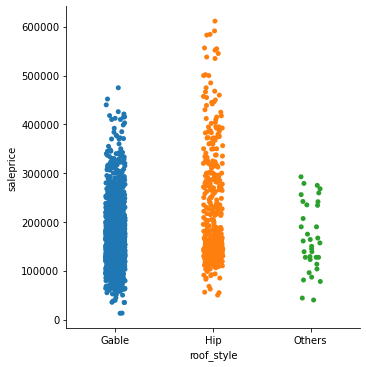

In [154]:
df.loc[df['roof_style'] == 'Flat', "roof_style"] = "Others"
df.loc[df['roof_style'] == 'Mansard', "roof_style"] = "Others"
df.loc[df['roof_style'] == 'Shed', "roof_style"] = "Others"
df.loc[df['roof_style'] == 'Gambrel', "roof_style"] = "Others"
sns.catplot(x="roof_style", y="saleprice", data = df)

In [155]:
df['roof_style'].value_counts()

Gable     1593
Hip        390
Others      35
Name: roof_style, dtype: int64

### Plots #4

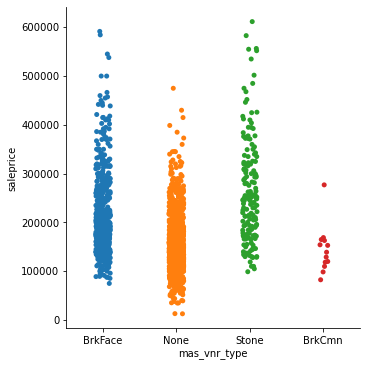

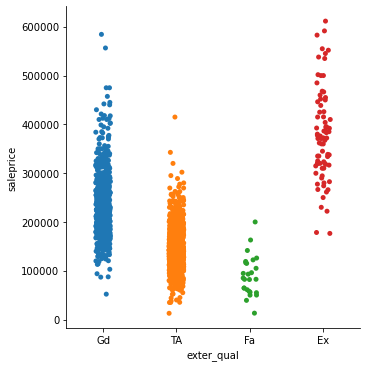

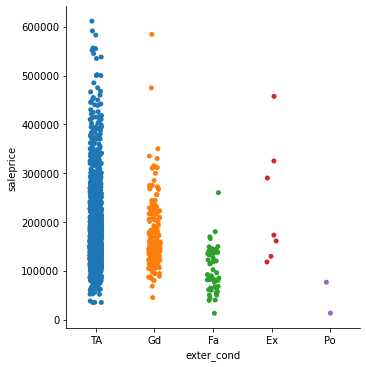

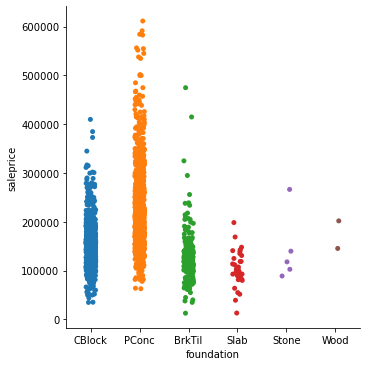

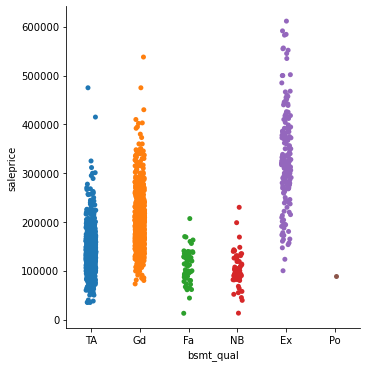

In [156]:
sns.catplot(x="mas_vnr_type", y="saleprice", data = df_cat)
sns.catplot(x="exter_qual", y="saleprice", data = df_cat)
sns.catplot(x="exter_cond", y="saleprice", data = df_cat)
sns.catplot(x="foundation", y="saleprice", data = df_cat)
sns.catplot(x="bsmt_qual", y="saleprice", data = df_cat)
#5 kept
#we are keeping all columns
#however, we need to change the ordinal scale data to continuous, so that
#their value will make sense. These are external quality, external condition
# and basement quality


In [157]:
df['exter_cond'].value_counts()

TA    1745
Gd     215
Fa      49
Ex       7
Po       2
Name: exter_cond, dtype: int64

In [158]:
df['exter_cond'] = df['exter_cond'].replace(['Po'],1)
df['exter_cond'] = df['exter_cond'].replace(['Fa'],2)
df['exter_cond'] = df['exter_cond'].replace(['TA'],3)
df['exter_cond'] = df['exter_cond'].replace(['Gd'],4)
df['exter_cond'] = df['exter_cond'].replace(['Ex'],5)


In [159]:
df['bsmt_qual'].value_counts()

TA    886
Gd    843
Ex    175
Fa     60
NB     53
Po      1
Name: bsmt_qual, dtype: int64

In [160]:
df['bsmt_qual'] = df['bsmt_qual'].replace(['NB'],0)
df['bsmt_qual'] = df['bsmt_qual'].replace(['Po'],1)
df['bsmt_qual'] = df['bsmt_qual'].replace(['Fa'],2)
df['bsmt_qual'] = df['bsmt_qual'].replace(['TA'],3)
df['bsmt_qual'] = df['bsmt_qual'].replace(['Gd'],4)
df['bsmt_qual'] = df['bsmt_qual'].replace(['Ex'],5)
#We have placed no basement as a value of 0, which would indicate that having no
#basement would have zero or some impact on the price

### Plots #5

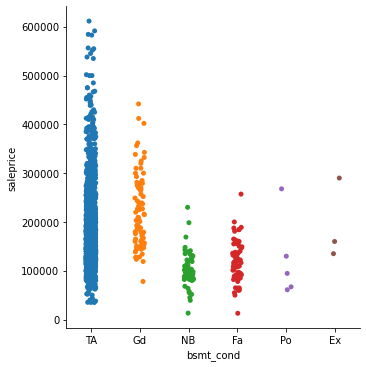

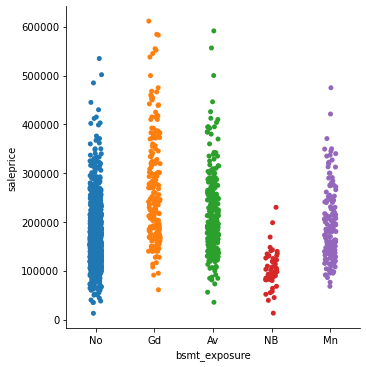

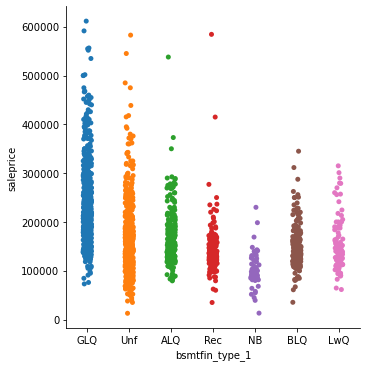

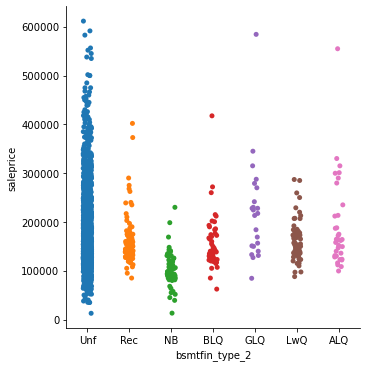

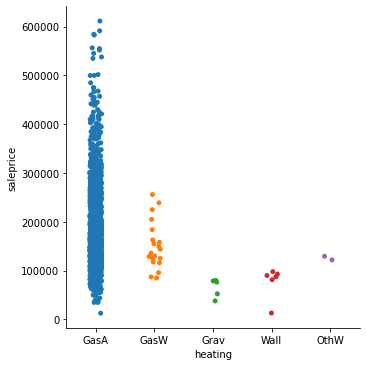

In [161]:
sns.catplot(x="bsmt_cond", y="saleprice", data = df_cat)
sns.catplot(x="bsmt_exposure", y="saleprice", data = df_cat)
sns.catplot(x="bsmtfin_type_1", y="saleprice", data = df_cat)
sns.catplot(x="bsmtfin_type_2", y="saleprice", data = df_cat)
sns.catplot(x="heating", y="saleprice", data = df_cat)
#4 kept
#we are keeping 4, except heating as it some columns have too few values
#however, we need to change the ordinal scale data to continuous, so that
#their value will make sense 

In [162]:
df['heating'].value_counts(normalize=True)
#too few data from the other datasets to be relevant, we will remove this

GasA    0.983647
GasW    0.009911
Wall    0.002973
Grav    0.002478
OthW    0.000991
Name: heating, dtype: float64

In [163]:
df.drop(columns = ["heating"], inplace = True )

In [164]:
df['bsmt_cond'].value_counts()

TA    1805
Gd      87
Fa      65
NB      53
Po       5
Ex       3
Name: bsmt_cond, dtype: int64

In [165]:
df['bsmt_cond'] = df['bsmt_cond'].replace(['NB'],0)
df['bsmt_cond'] = df['bsmt_cond'].replace(['Po'],1)
df['bsmt_cond'] = df['bsmt_cond'].replace(['Fa'],2)
df['bsmt_cond'] = df['bsmt_cond'].replace(['TA'],3)
df['bsmt_cond'] = df['bsmt_cond'].replace(['Gd'],4)
df['bsmt_cond'] = df['bsmt_cond'].replace(['Ex'],5)
#We have placed no basement as a value of 0, which we want to see ifhaving no
#basement would have zero or some impact on the price

In [166]:
df['bsmt_exposure'].value_counts()

No    1319
Av     283
Gd     200
Mn     163
NB      53
Name: bsmt_exposure, dtype: int64

In [167]:
df['bsmt_exposure'] = df['bsmt_exposure'].replace(['NB'],0)
df['bsmt_exposure'] = df['bsmt_exposure'].replace(['No'],1)
df['bsmt_exposure'] = df['bsmt_exposure'].replace(['Mn'],2)
df['bsmt_exposure'] = df['bsmt_exposure'].replace(['Av'],3)
df['bsmt_exposure'] = df['bsmt_exposure'].replace(['Gd'],4)


In [168]:
df['bsmtfin_type_1'].value_counts().sort_values()

NB      53
LwQ    102
Rec    182
BLQ    199
ALQ    291
Unf    590
GLQ    601
Name: bsmtfin_type_1, dtype: int64

In [169]:
df['bsmtfin_type_1'] = df['bsmtfin_type_1'].replace(['NB'],0)
df['bsmtfin_type_1'] = df['bsmtfin_type_1'].replace(['Unf'],1) #we are assuming an unfinished basement 
df['bsmtfin_type_1'] = df['bsmtfin_type_1'].replace(['LwQ'],2)  #provides less function than a low quality basement
df['bsmtfin_type_1'] = df['bsmtfin_type_1'].replace(['Rec'],3)
df['bsmtfin_type_1'] = df['bsmtfin_type_1'].replace(['BLQ'],4)
df['bsmtfin_type_1'] = df['bsmtfin_type_1'].replace(['ALQ'],5)
df['bsmtfin_type_1'] = df['bsmtfin_type_1'].replace(['GLQ'],6)

In [170]:
df['bsmtfin_type_2'].value_counts()

Unf    1720
Rec      80
LwQ      60
NB       53
BLQ      48
ALQ      34
GLQ      23
Name: bsmtfin_type_2, dtype: int64

In [171]:
df['bsmtfin_type_2'] = df['bsmtfin_type_2'].replace(['NB'],0)
df['bsmtfin_type_2'] = df['bsmtfin_type_2'].replace(['Unf'],1)
df['bsmtfin_type_2'] = df['bsmtfin_type_2'].replace(['LwQ'],2)
df['bsmtfin_type_2'] = df['bsmtfin_type_2'].replace(['Rec'],3)
df['bsmtfin_type_2'] = df['bsmtfin_type_2'].replace(['BLQ'],4)
df['bsmtfin_type_2'] = df['bsmtfin_type_2'].replace(['ALQ'],5)
df['bsmtfin_type_2'] = df['bsmtfin_type_2'].replace(['GLQ'],6)

### Plots #6

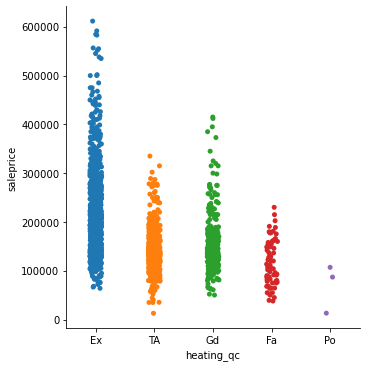

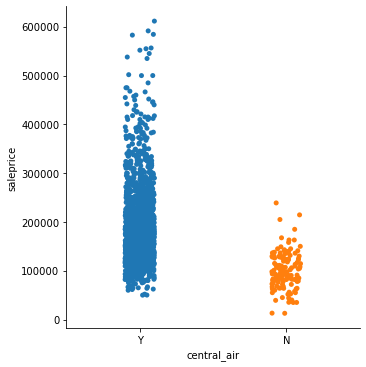

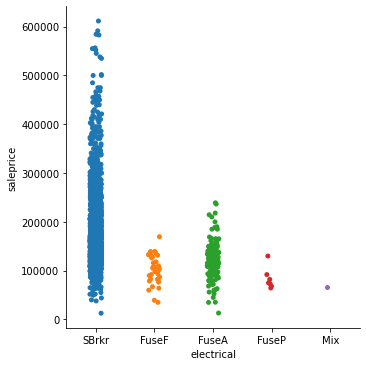

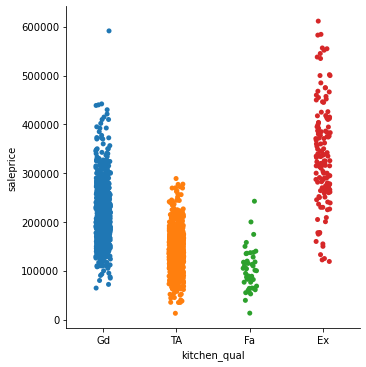

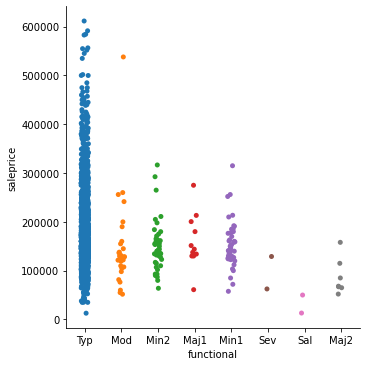

In [172]:
sns.catplot(x="heating_qc", y="saleprice", data = df_cat)
sns.catplot(x="central_air", y="saleprice", data = df_cat)
sns.catplot(x="electrical", y="saleprice", data = df_cat)
sns.catplot(x="kitchen_qual", y="saleprice", data = df_cat)
sns.catplot(x="functional", y="saleprice", data = df_cat)
#4 kept
#We are taking out functional as there too few alternative observations to have a meaningful deduction

In [173]:
df['functional'].value_counts(normalize=True)

Typ     0.933102
Min2    0.020813
Min1    0.020813
Mod     0.014371
Maj1    0.005451
Maj2    0.003469
Sev     0.000991
Sal     0.000991
Name: functional, dtype: float64

In [174]:
df.drop(columns = ["functional"], inplace = True )

In [175]:
df['heating_qc'].value_counts()

Ex    1035
TA     594
Gd     319
Fa      67
Po       3
Name: heating_qc, dtype: int64

In [176]:
df['heating_qc'] = df['heating_qc'].replace(['Po'],1)
df['heating_qc'] = df['heating_qc'].replace(['Fa'],2)
df['heating_qc'] = df['heating_qc'].replace(['TA'],3)
df['heating_qc'] = df['heating_qc'].replace(['Gd'],4)
df['heating_qc'] = df['heating_qc'].replace(['Ex'],5)

In [177]:
df['central_air'].value_counts()

Y    1877
N     141
Name: central_air, dtype: int64

In [178]:
df['central_air'] = df['central_air'].replace(['Y'],1)
df['central_air'] = df['central_air'].replace(['N'],0)

In [179]:
df['kitchen_qual'].value_counts()

TA    1044
Gd     783
Ex     144
Fa      47
Name: kitchen_qual, dtype: int64

In [180]:
df['kitchen_qual'] = df['kitchen_qual'].replace(['Fa'],1)
df['kitchen_qual'] = df['kitchen_qual'].replace(['TA'],2)
df['kitchen_qual'] = df['kitchen_qual'].replace(['Gd'],3)
df['kitchen_qual'] = df['kitchen_qual'].replace(['Ex'],4)

### Plots #7

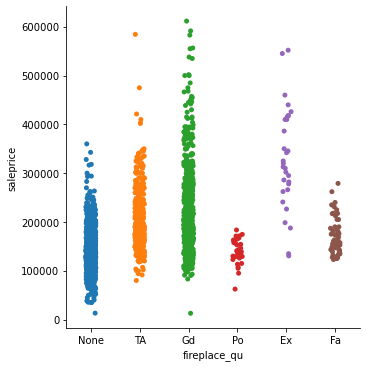

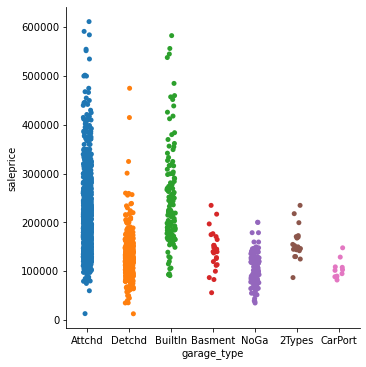

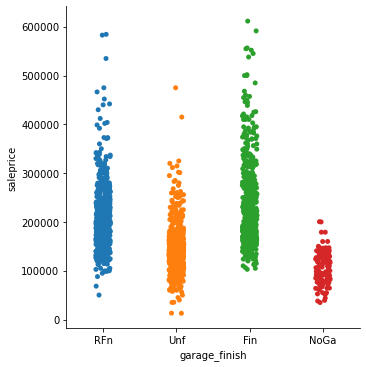

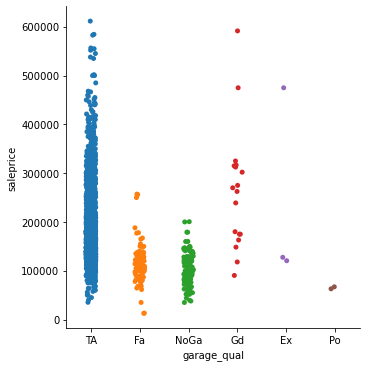

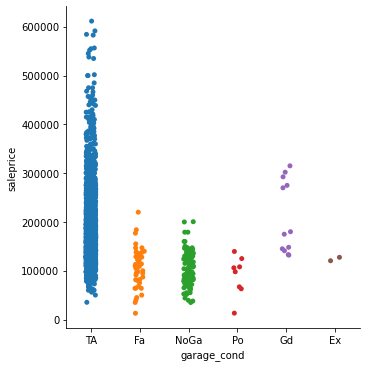

In [181]:
sns.catplot(x="fireplace_qu", y="saleprice", data = df_cat)
sns.catplot(x="garage_type", y="saleprice", data = df_cat)
sns.catplot(x="garage_finish", y="saleprice", data = df_cat)
sns.catplot(x="garage_qual", y="saleprice", data = df_cat)
sns.catplot(x="garage_cond", y="saleprice", data = df_cat)
#5 kept

In [182]:
df["fireplace_qu"].value_counts(normalize = True)

None    0.490089
Gd      0.251734
TA      0.198216
Fa      0.029237
Ex      0.015362
Po      0.015362
Name: fireplace_qu, dtype: float64

In [183]:
df['fireplace_qu'] = df['fireplace_qu'].replace(['None'],0)
df['fireplace_qu'] = df['fireplace_qu'].replace(['Po'],1)
df['fireplace_qu'] = df['fireplace_qu'].replace(['Fa'],2)
df['fireplace_qu'] = df['fireplace_qu'].replace(['TA'],3)
df['fireplace_qu'] = df['fireplace_qu'].replace(['Gd'],4)
df['fireplace_qu'] = df['fireplace_qu'].replace(['Ex'],5)

In [184]:
df["garage_finish"].value_counts(normalize = True)

Unf     0.418236
RFn     0.280971
Fin     0.245292
NoGa    0.055500
Name: garage_finish, dtype: float64

In [185]:
df['garage_finish'] = df['garage_finish'].replace(['NoGa'],0)
df['garage_finish'] = df['garage_finish'].replace(['Unf'],1)
df['garage_finish'] = df['garage_finish'].replace(['RFn'],2)
df['garage_finish'] = df['garage_finish'].replace(['Fin'],3)

In [186]:
df["garage_qual"].value_counts(normalize = True)

TA      0.892468
NoGa    0.055500
Fa      0.040634
Gd      0.008920
Ex      0.001487
Po      0.000991
Name: garage_qual, dtype: float64

In [187]:
df['garage_qual'] = df['garage_qual'].replace(['NoGa'],0)
df['garage_qual'] = df['garage_qual'].replace(['Po'],1)
df['garage_qual'] = df['garage_qual'].replace(['Fa'],2)
df['garage_qual'] = df['garage_qual'].replace(['TA'],3)
df['garage_qual'] = df['garage_qual'].replace(['Gd'],4)
df['garage_qual'] = df['garage_qual'].replace(['Ex'],5)

In [188]:
df["garage_cond"].value_counts(normalize = True)

TA      0.910307
NoGa    0.055500
Fa      0.023290
Gd      0.005946
Po      0.003964
Ex      0.000991
Name: garage_cond, dtype: float64

In [189]:
df["garage_cond"].value_counts()

TA      1837
NoGa     112
Fa        47
Gd        12
Po         8
Ex         2
Name: garage_cond, dtype: int64

In [190]:
df['garage_cond'] = df['garage_cond'].replace(['NoGa'],0)
df['garage_cond'] = df['garage_cond'].replace(['Po'],1)
df['garage_cond'] = df['garage_cond'].replace(['Fa'],2)
df['garage_cond'] = df['garage_cond'].replace(['TA'],3)
df['garage_cond'] = df['garage_cond'].replace(['Gd'],4)
df['garage_cond'] = df['garage_cond'].replace(['Ex'],5)

### Plots #8

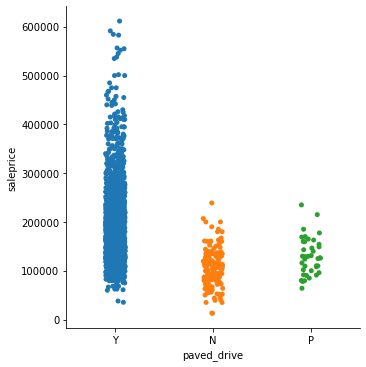

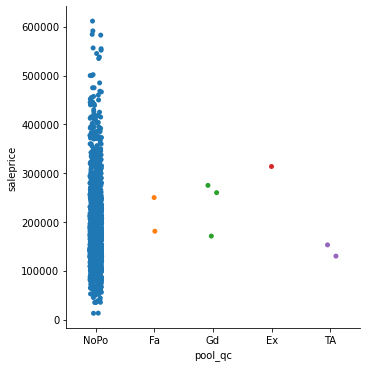

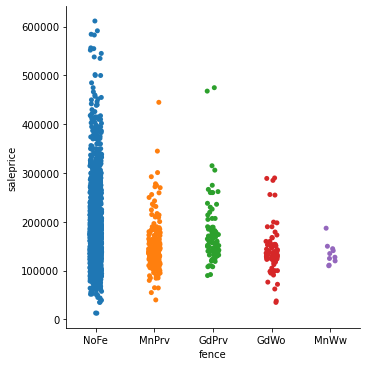

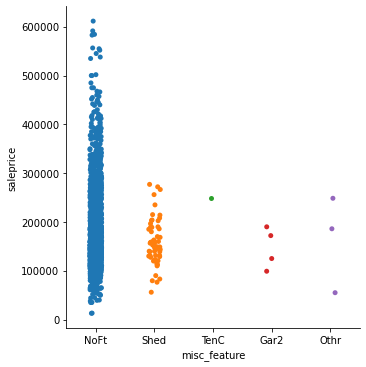

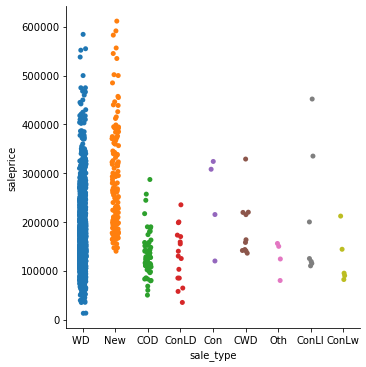

In [191]:
sns.catplot(x="paved_drive", y="saleprice", data = df)
sns.catplot(x="pool_qc", y="saleprice", data = df)
sns.catplot(x="fence", y="saleprice", data = df)
sns.catplot(x="misc_feature", y="saleprice", data = df)
sns.catplot(x="sale_type", y="saleprice", data = df)
#3 kept, there are too few points for other categories 
#such as pool_qc and misc_feature

In [192]:
df.drop(columns = ["pool_qc"], inplace = True )
df.drop(columns = ["misc_feature"], inplace = True )

In [193]:
df["paved_drive"].value_counts()

Y    1829
N     150
P      39
Name: paved_drive, dtype: int64

In [194]:
df['paved_drive'] = df['paved_drive'].replace(['N'],0) #Dirt/Gravel means no paved drive essentially 
df['paved_drive'] = df['paved_drive'].replace(['P'],1)
df['paved_drive'] = df['paved_drive'].replace(['Y'],2)

In [195]:
df["fence"].value_counts()

NoFe     1620
MnPrv     225
GdPrv      83
GdWo       80
MnWw       10
Name: fence, dtype: int64

In [196]:
df['fence'] = df['fence'].replace(['NoFe'],0)
df['fence'] = df['fence'].replace(['MnWw'],1)
df['fence'] = df['fence'].replace(['GdWo'],2)
df['fence'] = df['fence'].replace(['MnPrv'],3)
df['fence'] = df['fence'].replace(['GdPrv'],4)


## After all the cleaning...

In [197]:
df.shape
#from the categorical variables, we have dropped columns till 72
#and the number of rows to 2018 from 2051

(2018, 72)

# Doing the most simple model of square footage (Just to observe)

##### We will be doing a model based solely on the most obtuse form of square footage: "lot_area", then subsequently on more variables that are related to square footage.

In [198]:
X1 = df[["lot_area"]]

In [199]:
y = df["saleprice"]

In [200]:
lr= LinearRegression()

In [201]:
lr.fit(X1,y)

LinearRegression()

In [202]:
lr.coef_
#array([3.48616225])

array([3.65479963])

In [203]:
metrics.r2_score(y,lr.predict(X1))

0.09215264474140195

In [204]:
metrics.mean_squared_error(y, lr.predict(X1))

5693722432.896339

In [205]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, random_state=40)

In [206]:
cross_val_score(
    lr, #<- the given model
    X1_train,
    y_train,
    cv=5,
    scoring = 'neg_mean_squared_error'    #if not specified, then this uses the default.score on the given model,
    #which is R^2 for LR
   ).mean()

-6025810817.757338

In [207]:
rmse_X1 = (6006167310.458595)**0.5
print(rmse_X1)

77499.46651725155


In [208]:
cross_val_score(
    lr, #<- the given model
    X1_train,
    y_train,
    cv=5,
   ).mean()

0.08426487706773153

We have a very bad cross-val-score!

# Square Footage and Location

In [209]:
X3 = df[['lot_area',
         '1st_flr_sf','gr_liv_area','garage_cars','garage_area',
        'ms_zoning','neighborhood','condition_1','condition_2']]

In [210]:
X3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 0 to 2050
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lot_area      2018 non-null   int64  
 1   1st_flr_sf    2018 non-null   int64  
 2   gr_liv_area   2018 non-null   int64  
 3   garage_cars   2018 non-null   float64
 4   garage_area   2018 non-null   float64
 5   ms_zoning     2018 non-null   object 
 6   neighborhood  2018 non-null   object 
 7   condition_1   2018 non-null   object 
 8   condition_2   2018 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 222.2+ KB


#### We have to dummify the values for those parameters that are categorical


In [211]:
df["ms_zoning"].value_counts().head()

RL         1576
RM          314
FV           92
C (all)      19
RH           14
Name: ms_zoning, dtype: int64

In [212]:
X3 = pd.get_dummies(
    columns = ['ms_zoning'],
    drop_first = True,
    data = X3
)

In [213]:
df["ms_zoning"].value_counts().head()

RL         1576
RM          314
FV           92
C (all)      19
RH           14
Name: ms_zoning, dtype: int64

In [214]:
X3 = pd.get_dummies(
    columns = ['neighborhood'],
    drop_first = True, # means that we will drop the first season, 
    #and the reason we do this is so that we can estimate our linear regression 
    data = X3
)

In [215]:
X3["condition_1"].value_counts().head()

Norm      1741
Feedr      105
Artery      70
RRAn        33
PosN        27
Name: condition_1, dtype: int64

In [216]:
X3 = pd.get_dummies(
    columns = ['condition_1'],
    drop_first = True,
    data = X3
)

In [217]:
X3["condition_2"].value_counts().head()

Norm      1992
Feedr       11
Artery       5
PosN         3
PosA         3
Name: condition_2, dtype: int64

In [218]:
X3 = pd.get_dummies(
    columns = ['condition_2'],
    drop_first = True,
    data = X3
)

#### Fitting the linear regression

In [219]:
lr.fit(X3,y)

LinearRegression()

In [220]:
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, random_state=40)

In [221]:
cross_val_score(
    lr, 
    X3_train,
    y_train,
    cv=5,
    scoring = 'neg_mean_squared_error'    
   ).mean()

-1305487354.2789197

In [222]:
#RMSE of R3
1305487354.2789197**0.5

36131.52853504706

### Square Footage and Location: Lasso

In [223]:
sc = StandardScaler()

In [224]:
sc.fit(X3_train)
Z3_train = sc.transform(X3_train)
Z3_test = sc.transform(X3_test)

In [225]:
cross_val_score(
    lr,
    Z3_train,
    y_train,
    cv=5,
    scoring = 'neg_mean_squared_error'  
   ).mean()

-8.464379326665533e+32

In [226]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0 , 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(
    alphas= l_alphas,
    cv = 5,
    max_iter = 50_000,
)

# Fit model using best ridge alpha!

lasso_cv.fit(Z3_train, y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1017230521.2724609, tolerance: 785102934.3601661
  model = cd_fast.enet_coordinate_descent_gram(


LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]),
        cv=5, max_iter=50000)

In [227]:
lasso_cv.coef_

array([  6883.25961069,  17214.02486609,  27734.49575259,   1845.26821211,
        10376.18023407,   6093.95500866,  16232.89283317,   1057.84272763,
         6381.54708845,  31785.37466844,  30450.03410703,  -1214.86111908,
        -3310.12573452,  -7275.3483438 ,  -3919.70457811,  -1857.5998315 ,
        -1731.03320261, -12703.92597677,  -2269.18464553,    173.36331414,
         2811.60586288,  -9962.39648508,   -795.92913922,  -4208.29923233,
        -5390.20116429, -14465.68900619,  -2149.46437548,  -6886.89237642,
         4716.84663761,  13025.63602173, -16404.95601579,  -5277.65557126,
        -7844.43381363,  -4656.26876171,   3076.47647115,   9972.09495379,
          824.15332378,   -514.20692168,   -736.0374157 ,   3074.39460722,
          655.70650074,   3764.23392324,    157.05356429,    663.00181665,
           70.90650532,    467.63694257,   -485.91571619,    422.97852163,
         4110.61295408,   1521.27801015,  -1285.12776573,  -1364.80272234,
          927.31949489])

In [228]:
lasso_cv.alpha_

0.04037017258596556

In [229]:
lasso=Lasso(lasso_cv.alpha_)

In [230]:
cross_val_score(
    lasso, 
    X3_train,
    y_train,
    cv=5,
    scoring = 'neg_mean_squared_error'    
   ).mean()

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 696498135630.8082, tolerance: 778471080.8053297
  model = cd_fast.enet_coordinate_descent(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 720653693505.1023, tolerance: 859866543.78904
  model = cd_fast.enet_coordinate_descent(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 632665448749.1755, tolerance: 737385406.4009914
  model = cd_fast.enet_coordinate_descent(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Obj

-1306400872.648282

In [231]:
1306400872.648282**0.5

36144.16789259759

# Quality and Surrounding Facade

In [232]:
X4 = df[['overall_qual','overall_cond','age_house','recent_remod/add','full_bath','totrms_abvgrd','fireplaces','foundation',
        'house_style','roof_style','exterior_1st','exterior_2nd','bldg_type','mas_vnr_area','mas_vnr_type','exter_qual','exter_cond'        ]]

In [233]:
X4 = X3.join(X4)

In [339]:
X4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 0 to 2050
Columns: 114 entries, lot_area to exter_qual_TA
dtypes: float64(3), int64(11), uint8(100)
memory usage: 498.1 KB


In [234]:
X4 = pd.get_dummies(
    columns = ['foundation'],
    drop_first = True, 
    data = X4
)

In [235]:
X4["house_style"].value_counts();

In [236]:
X4["roof_style"].value_counts();

In [237]:
X4["exterior_1st"].value_counts();

In [238]:
X4["exterior_2nd"].value_counts();

In [239]:
X4["bldg_type"].value_counts();

In [240]:
X4["mas_vnr_type"].value_counts();

In [241]:
X4["exter_qual"].value_counts();

In [242]:
X4 = pd.get_dummies(
    columns = ['house_style'],
    drop_first = True, 
    data = X4
)

In [243]:
X4 = pd.get_dummies(
    columns = ['roof_style'],
    drop_first = True, 
    data = X4
)

In [244]:
X4 = pd.get_dummies(
    columns = ['exterior_1st'],
    drop_first = True, 
    data = X4
)

In [245]:
X4 = pd.get_dummies(
    columns = ['exterior_2nd'],
    drop_first = True, 
    data = X4
)

In [246]:
X4 = pd.get_dummies(
    columns = ['bldg_type'],
    drop_first = True, 
    data = X4
)

In [247]:
X4 = pd.get_dummies(
    columns = ['mas_vnr_type'],
    drop_first = True, 
    data = X4
)

In [248]:
X4 = pd.get_dummies(
    columns = ['exter_qual'],
    drop_first = True, 
    data = X4
)

In [249]:
X4.shape

(2018, 114)

#### Fitting the Linear Regression 

In [250]:
lr.fit(X4,y)

LinearRegression()

In [251]:
X4_train, X4_test, y_train, y_test = train_test_split(X4, y, random_state=40)

In [252]:
cross_val_score(
    lr, 
    X4_train,
    y_train,
    cv=5,
    scoring = 'neg_mean_squared_error'  
   ).mean()

-796288056.6395161

In [253]:
rsme_X4 = 796288056.639509**0.5
rsme_X4

28218.576446013518

# Basement and other features

In [254]:
X5 = df[['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2','bsmtfin_sf_1','total_bsmt_sf']]

In [255]:
X5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 0 to 2050
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bsmt_qual       2018 non-null   int64  
 1   bsmt_cond       2018 non-null   int64  
 2   bsmt_exposure   2018 non-null   int64  
 3   bsmtfin_type_1  2018 non-null   int64  
 4   bsmtfin_type_2  2018 non-null   int64  
 5   bsmtfin_sf_1    2018 non-null   float64
 6   total_bsmt_sf   2018 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 190.7 KB


In [343]:
X9.shape

(2012, 117)

In [256]:
X5 = X4.join(X5)

In [257]:
lr.fit(X5,y)

LinearRegression()

In [258]:
X5_train, X5_test, y_train, y_test = train_test_split(X5, y, random_state=40)

In [259]:
cross_val_score(
    lr, 
    X5_train,
    y_train,
    cv=5,
    scoring = 'neg_mean_squared_error'  
   ).mean()

-635516007.9213841

In [260]:
rsme_X5 = 635516007.9213841**0.5
rsme_X5

25209.442832426583

We want to see if we can improve these any further by looking at features that we might have missed out. As we want to optimise the parameters to advice our clients, getting a better coefficient would be important.

We will be assessing our assumptions for multiple linear regression.

L - Linear relationship
I - Independent erros
N - Normally distributed erros
E - Equal variance of errors (homoscedasticity)
M - No Multicollinearity/Independence of Predictors



In [261]:
df_num = df[['overall_qual', 'age_house', 'mas_vnr_area', 'bsmtfin_sf_1', 'total_bsmt_sf', '1st_flr_sf', 'gr_liv_area', 'full_bath', 'totrms_abvgrd', 'fireplaces', 'garage_cars', 'garage_area', 'recent_remod/add']]


<AxesSubplot:xlabel='overall_qual', ylabel='saleprice'>

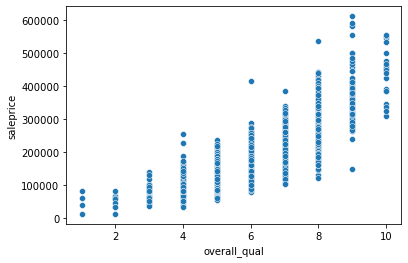

In [262]:
sns.scatterplot(data=df, x= "overall_qual", y="saleprice")

The overall_qual scatter plot seems to be going upwards in a positive linear relationship.


<AxesSubplot:xlabel='age_house', ylabel='saleprice'>

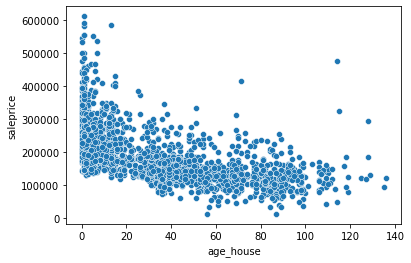

In [263]:
sns.scatterplot(data=df, x= "age_house", y="saleprice")

The data does not seem to have a linear relationship, but various transformations did not seem to work.

<AxesSubplot:xlabel='mas_vnr_area', ylabel='saleprice'>

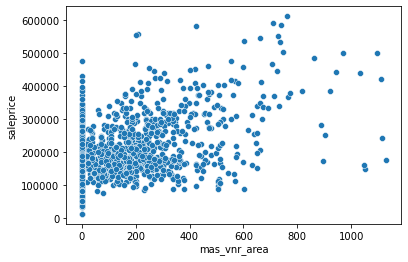

In [264]:
sns.scatterplot(data=df, x= "mas_vnr_area", y="saleprice")

In [265]:
df["mas_vnr_area"]

0       289.0
1       132.0
2         0.0
3         0.0
4         0.0
        ...  
2046      0.0
2047      0.0
2048      0.0
2049      0.0
2050      0.0
Name: mas_vnr_area, Length: 2018, dtype: float64

In [266]:
df[df["mas_vnr_area"]==0]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,alley,lot_shape,land_contour,land_slope,...,screen_porch,pool_area,fence,misc_val,mo_sold,yr_sold,sale_type,saleprice,age_house,recent_remod/add
2,153,535304180,20,RL,68.0,7922,NoAC,4,Lvl,1,...,0,0,0,0,1,2010,WD,109000,57,3
3,318,916386060,60,RL,73.0,9802,NoAC,4,Lvl,1,...,0,0,0,0,4,2010,WD,174000,4,3
4,255,906425045,50,RL,82.0,14235,NoAC,3,Lvl,1,...,0,0,0,0,3,2010,WD,138500,110,17
5,138,535126040,20,RL,137.0,16492,NoAC,3,Lvl,1,...,0,0,0,0,6,2010,WD,190000,44,8
8,1942,535353130,20,RL,0.0,15783,NoAC,4,Lvl,1,...,0,0,3,400,6,2007,WD,112500,55,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,NoAC,3,HLS,1,...,0,0,0,0,1,2008,WD,298751,1,1
2047,785,905377130,30,RL,0.0,12342,NoAC,3,Lvl,1,...,0,0,0,0,3,2009,WD,82500,69,59
2048,916,909253010,50,RL,57.0,7558,NoAC,4,Bnk,1,...,0,0,0,0,3,2009,WD,177000,81,59
2049,639,535179160,20,RL,80.0,10400,NoAC,4,Lvl,1,...,0,0,0,0,11,2009,WD,144000,53,53


In [267]:
#Even though the log transformation looked better, but we cannot fit this log transformation due to the many 0 values
# that cause the log to be -infinity
#we tried to remove "mas_vnr_area" to see if there is apositive impact but the RMSE increased instead. We therefore will keep 
#mas_vnr_area

<AxesSubplot:xlabel='bsmtfin_type_1', ylabel='saleprice'>

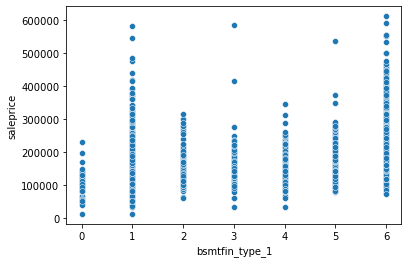

In [268]:
sns.scatterplot(data=df, x= "bsmtfin_type_1", y="saleprice")

<AxesSubplot:xlabel='bsmtfin_type_2', ylabel='saleprice'>

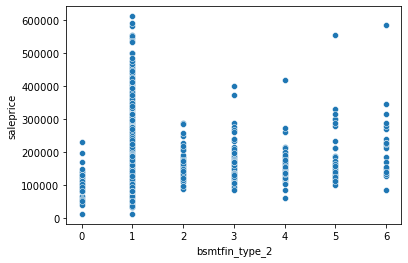

In [269]:
sns.scatterplot(data=df, x= "bsmtfin_type_2", y="saleprice")

Both of these do not seem to display a linear relationship, and does not follow an increase according to the ordinal scales. We will attempt to remove them.

In [270]:
X7=X5.drop(columns= ["bsmtfin_type_1"])

In [271]:
X7=X7.drop(columns= ["bsmtfin_type_2"])

In [272]:
lr.fit(X7,y)
X7_train, X7_test, y_train, y_test = train_test_split(X7, y, random_state=40)
cross_val_score(
    lr, 
    X7_train,
    y_train,
    cv=5,
    scoring = 'neg_mean_squared_error'  
   ).mean()

-634069310.819698

In [273]:
634069310.819698**0.5
#there seems to be a decrease in the  RMSE. We will therefore keep this deletion.
#X7 is now the latest dataframe to use

25180.73292856461

Between bsmtfin_sf_1 and total_bsmt_sf, there seems to be multicollinarity. We will try to remove bsmtfin_sf_1.
However, RMSE increased, and we shall retain bsmtfin_sf_1

<AxesSubplot:xlabel='lot_area', ylabel='saleprice'>

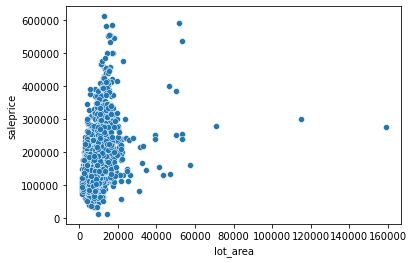

In [274]:
sns.scatterplot(data=df, x= "lot_area", y="saleprice")

In [275]:
df["log_area"]= log(df["lot_area"])

NameError: name 'log' is not defined

In [ ]:
sns.scatterplot(data=df, x= "log_area", y="saleprice")
#seems to have more linearity, and we will keep this model

In [276]:
X8=X7.drop(columns= ["lot_area"])

In [277]:
X8=X8.join(df["log_area"])

KeyError: 'log_area'

<AxesSubplot:xlabel='1st_flr_sf', ylabel='saleprice'>

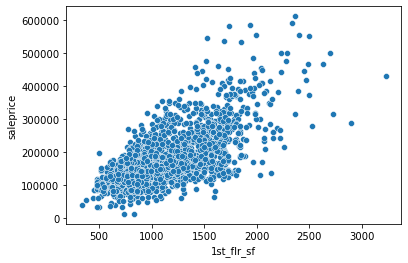

In [278]:
sns.scatterplot(data=df, x= "1st_flr_sf", y="saleprice")
#not much changes

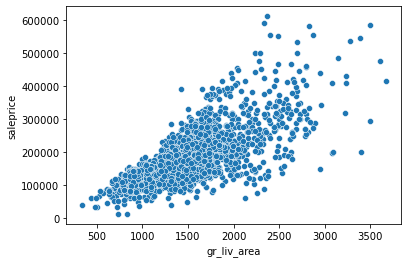

In [279]:
sns.scatterplot(data=df, x= "gr_liv_area", y="saleprice");
#not much changes

<AxesSubplot:xlabel='full_bath', ylabel='saleprice'>

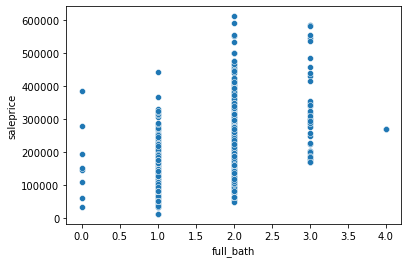

In [280]:
sns.scatterplot(data=df, x= "full_bath", y="saleprice")
#will remove the last full-bath value

In [281]:
X8[X8["full_bath"] == 4]

,1st_flr_sf,gr_liv_area,garage_cars,garage_area,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,...,mas_vnr_type_None,mas_vnr_type_Stone,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_sf_1,total_bsmt_sf
1566,1168,2787,4.0,820.0,0,0,0,0,1,0,...,0,0,0,0,1,5,3,1,820.0,1168.0
1605,1168,2787,4.0,820.0,0,0,0,0,1,0,...,0,0,0,0,1,5,3,1,820.0,1168.0


In [282]:
X8 = X8.loc[X8["full_bath"] != 4]

In [283]:
X8[X8["full_bath"] == 4]

,1st_flr_sf,gr_liv_area,garage_cars,garage_area,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,...,mas_vnr_type_None,mas_vnr_type_Stone,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_sf_1,total_bsmt_sf


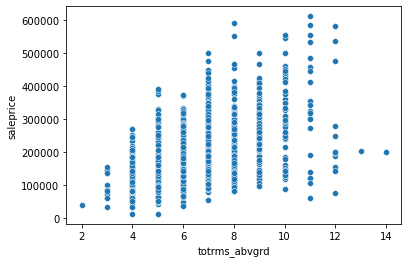

In [284]:
sns.scatterplot(data=df, x= "totrms_abvgrd", y="saleprice");
#will remove the last two values

In [285]:
X8[X8["totrms_abvgrd"] >= 13]

,1st_flr_sf,gr_liv_area,garage_cars,garage_area,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,...,mas_vnr_type_None,mas_vnr_type_Stone,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_sf_1,total_bsmt_sf
858,1440,3395,0.0,0.0,0,0,0,1,0,0,...,1,0,1,0,0,3,2,1,256.0,1440.0
1791,1240,2480,2.0,400.0,0,0,0,0,1,0,...,1,0,0,0,1,3,3,1,246.0,920.0


In [286]:
X8 = X8.loc[X8["totrms_abvgrd"] != 13]
X8 = X8.loc[X8["totrms_abvgrd"] != 14]

<AxesSubplot:xlabel='fireplaces', ylabel='saleprice'>

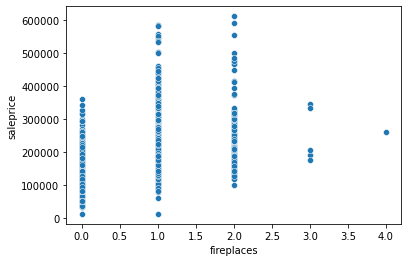

In [287]:
sns.scatterplot(data=df, x= "fireplaces", y="saleprice")

In [288]:
X8 = X8.loc[X8["fireplaces"] != 4.0]

In [289]:
X8["garage_area"]

0       475.0
1       559.0
2       246.0
3       400.0
4       484.0
        ...  
2046    520.0
2047    539.0
2048    342.0
2049    294.0
2050    442.0
Name: garage_area, Length: 2013, dtype: float64

In [290]:
X8[X8["fireplaces"] == 4.0]

,1st_flr_sf,gr_liv_area,garage_cars,garage_area,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,...,mas_vnr_type_None,mas_vnr_type_Stone,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_sf_1,total_bsmt_sf


<AxesSubplot:xlabel='garage_cars', ylabel='saleprice'>

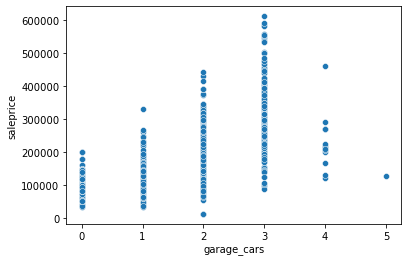

In [291]:
sns.scatterplot(data=df, x= "garage_cars", y="saleprice")

In [292]:
X8 = X8.loc[X8["garage_cars"] != 5]

<AxesSubplot:xlabel='garage_area', ylabel='saleprice'>

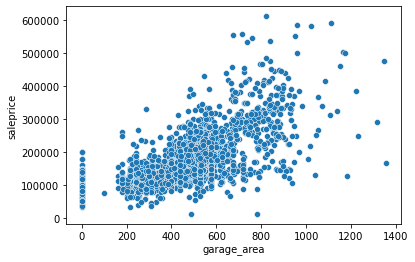

In [293]:
sns.scatterplot(data=df, x= "garage_area", y="saleprice")
#no changes

<AxesSubplot:xlabel='recent_remod/add', ylabel='saleprice'>

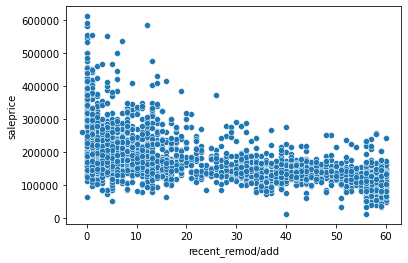

In [294]:
sns.scatterplot(data=df, x= "recent_remod/add", y="saleprice")
#no changes

Final model:

In [295]:
df = df.loc[df["full_bath"] != 4]
df = df.loc[df["fireplaces"] != 4.0]
df = df.loc[df["totrms_abvgrd"] != 13]
df = df.loc[df["totrms_abvgrd"] != 14]
df = df.loc[df["garage_cars"] != 5]

In [296]:
y=df["saleprice"]

In [297]:
lr.fit(X8,y)


LinearRegression()

In [298]:
X8_train, X8_test, y_train, y_test = train_test_split(X8, y, random_state=40)


In [299]:
cross_val_score(
    lr, 
    X8_train,
    y_train,
    cv=5,
    scoring = 'neg_mean_squared_error'  
   ).mean()

-641175144.8400925

In [300]:
623481816.4959749**0.5

24969.617868441135

# Ridge CV

In [301]:
sc = StandardScaler()
#Z_train = sc.fit_transform(X_train) <- this was in the notes, the below is the long form
sc.fit(X8_train) #fit should only see the train data 
Z8_train = sc.transform(X8_train)
Z8_test = sc.transform(X8_test)

In [302]:
# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
r_alphas = np.logspace(0, 5, 100) 
# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(
    alphas = r_alphas,
    scoring = "neg_mean_squared_error",
    cv = 5
)
# Fit model using best ridge alpha!
ridge_cv.fit(Z8_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, scoring='neg_mean_squared_error')

In [303]:
ridge_cv.alpha_

11.497569953977356

# Lasso CV

In [304]:
l_alphas = np.logspace(-3, 50 , 100)

lasso_cv = LassoCV(
    alphas= l_alphas,
    cv = 5,
    max_iter = 50_000,
)

lasso_cv.fit(Z8_train, y_train)

LassoCV(alphas=array([1.00000000e-03, 3.43046929e-03, 1.17681195e-02, 4.03701726e-02,
       1.38488637e-01, 4.75081016e-01, 1.62975083e+00, 5.59081018e+00,
       1.91791026e+01, 6.57933225e+01, 2.25701972e+02, 7.74263683e+02,
       2.65608778e+03, 9.11162756e+03, 3.12571585e+04, 1.07226722e+05,
       3.67837977e+05, 1.26185688e+06, 4.32876128e+06, 1.48496826e+07,
       5.09413801e+07, 1.74752840e+0...
       4.86260158e+37, 1.66810054e+38, 5.72236766e+38, 1.96304065e+39,
       6.73415066e+39, 2.31012970e+40, 7.92482898e+40, 2.71858824e+41,
       9.32603347e+41, 3.19926714e+42, 1.09749877e+43, 3.76493581e+43,
       1.29154967e+44, 4.43062146e+44, 1.51991108e+45, 5.21400829e+45,
       1.78864953e+46, 6.13590727e+46, 2.10490414e+47, 7.22080902e+47,
       2.47707636e+48, 8.49753436e+48, 2.91505306e+49, 1.00000000e+50]),
        cv=5, max_iter=50000)

In [305]:
lasso_cv.alpha_

225.70197196339214

In [306]:
lasso_cv.coef_

array([ 1.25522062e+03,  2.76193438e+04,  0.00000000e+00,  4.04806539e+03,
       -3.28412612e+02,  2.18355232e+03,  6.73342584e+02,  0.00000000e+00,
        0.00000000e+00, -1.22464187e+03,  4.60955831e+02,  1.57312082e+03,
        4.71236344e+02,  8.30481456e+02, -1.35932402e+03,  2.36607988e+03,
       -1.29580339e+03, -5.09580974e+02,  0.00000000e+00,  4.09321607e+03,
       -0.00000000e+00,  0.00000000e+00,  7.11285030e+01, -5.79024570e+02,
       -1.99626711e+03,  1.37853051e+03, -2.10445609e+03,  3.82053260e+03,
        7.06372744e+03, -7.15642784e+02, -4.10064602e+02, -0.00000000e+00,
       -4.88214068e+02,  1.04128172e+03,  7.97763177e+03,  7.88457686e+01,
        0.00000000e+00,  0.00000000e+00,  2.37282902e+03,  5.97405031e+02,
        2.09245977e+03, -0.00000000e+00,  2.01138847e+01,  1.97115745e+02,
       -3.14662628e+02,  0.00000000e+00,  0.00000000e+00,  1.21531424e+03,
       -7.32807099e+02, -0.00000000e+00,  0.00000000e+00,  4.34466464e+02,
        1.18654502e+04,  

In [307]:
lasso_coef = pd.DataFrame(data=lasso_cv.coef_,
                          index=X8_train.columns,
                          columns=['coef'])



In [308]:
lasso_coef

,coef
1st_flr_sf,1255.220623
gr_liv_area,27619.343770
garage_cars,0.000000
garage_area,4048.065392
ms_zoning_C (all),-328.412612
ms_zoning_FV,2183.552321
ms_zoning_I (all),673.342584
ms_zoning_RH,0.000000
ms_zoning_RL,0.000000
ms_zoning_RM,-1224.641866


In [309]:
lasso_0 = lasso_coef.loc[lasso_coef['coef'] == 0, :]
lasso_0

,coef
garage_cars,0.0
ms_zoning_RH,0.0
ms_zoning_RL,0.0
neighborhood_Greens,0.0
neighborhood_IDOTRR,-0.0
neighborhood_Landmrk,0.0
neighborhood_Sawyer,-0.0
neighborhood_Veenker,0.0
condition_1_Feedr,0.0
condition_1_RRAe,-0.0


In [310]:
#We will remove variables that have 50% or more where their categories' coefficients are 0
#we have identified "garage_cars" and "exterior_2nd" to be removed

In [311]:
lasso=Lasso(lasso_cv.alpha_)

In [312]:
cross_val_score(
    lasso, 
    X8_train,
    y_train,
    cv=5,
    scoring = 'neg_mean_squared_error'    
   ).mean()

-678398428.2926891

In [313]:
618754680.7149057**0.5
#our final RMSE score

24874.78001339722

#### removing of two categories

In [342]:
X9.columns

Index(['1st_flr_sf', 'gr_liv_area', 'garage_area', 'ms_zoning_C (all)',
       'ms_zoning_FV', 'ms_zoning_I (all)', 'ms_zoning_RH', 'ms_zoning_RL',
       'ms_zoning_RM', 'neighborhood_Blueste',
       ...
       'mas_vnr_type_None', 'mas_vnr_type_Stone', 'exter_qual_Fa',
       'exter_qual_Gd', 'exter_qual_TA', 'bsmt_qual', 'bsmt_cond',
       'bsmt_exposure', 'bsmtfin_sf_1', 'total_bsmt_sf'],
      dtype='object', length=117)

In [314]:
df["exterior_2nd"].value_counts()

VinylSd    695
MetalSd    324
HdBoard    275
Wd Sdng    259
Plywood    183
CmentBd     86
Wd Shng     62
BrkFace     34
Stucco      29
AsbShng     28
Brk Cmn     17
ImStucc     11
Stone        5
AsphShn      3
CBlock       1
Name: exterior_2nd, dtype: int64

In [315]:
X9 = X8.drop(columns = ['exterior_2nd_VinylSd', 'exterior_2nd_MetalSd','exterior_2nd_HdBoard','exterior_2nd_Wd Sdng','exterior_2nd_Plywood','exterior_2nd_CmentBd','exterior_2nd_Wd Shng','exterior_2nd_BrkFace','exterior_2nd_Stucco','exterior_2nd_Brk Cmn','exterior_2nd_ImStucc','exterior_2nd_Stone','exterior_2nd_AsphShn','exterior_2nd_CBlock']) 

In [316]:
X9 = X8.drop(columns = ['garage_cars'])

In [317]:
lr.fit(X9,y)


LinearRegression()

In [318]:
X9_train, X9_test, y_train, y_test = train_test_split(X9, y, random_state=40)


In [319]:
cross_val_score(
    lr, 
    X9_train,
    y_train,
    cv=5,
    scoring = 'neg_mean_squared_error'  
   ).mean()

-640213676.8612542

In [320]:
622745815.5810531**0.5

24954.875587368755

In [321]:
sc = StandardScaler()
#Z_train = sc.fit_transform(X_train) <- this was in the notes, the below is the long form
sc.fit(X9_train) #fit should only see the train data 
Z9_train = sc.transform(X9_train)
Z9_test = sc.transform(X9_test)

In [322]:
l_alphas = np.logspace(-3, 50 , 100)

lasso_cv = LassoCV(
    alphas= l_alphas,
    cv = 5,
    max_iter = 50_000,
)

lasso_cv.fit(Z9_train, y_train)

LassoCV(alphas=array([1.00000000e-03, 3.43046929e-03, 1.17681195e-02, 4.03701726e-02,
       1.38488637e-01, 4.75081016e-01, 1.62975083e+00, 5.59081018e+00,
       1.91791026e+01, 6.57933225e+01, 2.25701972e+02, 7.74263683e+02,
       2.65608778e+03, 9.11162756e+03, 3.12571585e+04, 1.07226722e+05,
       3.67837977e+05, 1.26185688e+06, 4.32876128e+06, 1.48496826e+07,
       5.09413801e+07, 1.74752840e+0...
       4.86260158e+37, 1.66810054e+38, 5.72236766e+38, 1.96304065e+39,
       6.73415066e+39, 2.31012970e+40, 7.92482898e+40, 2.71858824e+41,
       9.32603347e+41, 3.19926714e+42, 1.09749877e+43, 3.76493581e+43,
       1.29154967e+44, 4.43062146e+44, 1.51991108e+45, 5.21400829e+45,
       1.78864953e+46, 6.13590727e+46, 2.10490414e+47, 7.22080902e+47,
       2.47707636e+48, 8.49753436e+48, 2.91505306e+49, 1.00000000e+50]),
        cv=5, max_iter=50000)

In [330]:
lasso_cv.alpha_


225.70197196339214

In [331]:
lasso=Lasso(lasso_cv.alpha_)


In [332]:
cross_val_score(
    lasso, 
    X9_train,
    y_train,
    cv=5,
    scoring = 'neg_mean_squared_error'    
   ).mean()

-678397315.7314049

In [336]:
lasso.fit(X9,y)

Lasso(alpha=225.70197196339214)

In [333]:
665193645.930629**0.5

25791.348276711495

# Elastic Net

In [1363]:
from sklearn.linear_model import ElasticNetCV

In [1365]:
# Set up a list of alphas to check.
enet_alphas = np.linspace(0.5, 1.0, 100)

# Set up our l1 ratio. (What does this do?)
enet_ratio = np.array([0.1,0.25,0.5,0.75,0.9])

# Instantiate model.
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

# Fit model using optimal alpha.
enet_model = enet_model.fit(X8_train, y_train)

# Generate predictions.
enet_model_preds = enet_model.predict(X8_test)
enet_model_preds_train = enet_model.predict(X8_train)

# Evaluate model.
print(enet_model.score(X8_train, y_train))
print(enet_model.score(X8_test, y_test))

0.9062508267893703
0.8926338643916647


In [128]:
df2= pd.read_csv("datasets/test.csv")
df2

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,11,2007,WD
874,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD
875,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2008,WD
876,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,GdWo,NaN,0,5,2007,WD


# Conclusion / Recommendations

Our best model is that of the X9, with a RMSE of 24954.875587368755 and the following variables:

'lot_area','1st_flr_sf','gr_liv_area','garage_area','ms_zoning','neighborhood','condition_1','condition_2''overall_qual','overall_cond','age_house','recent_remod/add','full_bath','totrms_abvgrd','fireplaces','foundation', 'house_style','roof_style','exterior_1st','bldg_type','mas_vnr_area','mas_vnr_type','exter_qual','exter_cond'   
'bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2','bsmtfin_sf_1','total_bsmt_sf'

We would recommend this model to our higher ups to get them to access the price of new houses in Ames, and use this as a baseline model for prediction.


Recommendations:

There are other factors that can affect the price of the house however, that might not be present in this dataset as can be seen in the high amount variability and error in RMSE.

There appears to be three main indicators that affect price of the house
1) Quality of local schools
2) Employment opportunities
3) Proximity to shoppping, entertainment and recreational centers 

https://www.opendoor.com/w/blog/factors-that-influence-home-value

Other factors include:
1) Individual fittings and quality
https://www.yopa.co.uk/blog/how-does-an-estate-agent-value-a-property/ 

Therefore, there could be other factors that we can consider adopting and exploring:

Location factors:
Presence of good schools within a 10 minute driving distance 
Distance / Time taken by car to local supermarket
Presence of greenery and parks
Distance to city Business District 

Quality of the fittings inside the house:
Window fittings
Renovation of toilets and bedrooms

